In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
pets_prepared = pd.read_csv("../Technical Assessment/data/pets_prepared.csv")
color_labels = pd.read_csv("../Technical Assessment/data/color_labels.csv")
breed_labels = pd.read_csv("../Technical Assessment/data/breed_labels.csv")
state_labels = pd.read_csv("../Technical Assessment/data/state_labels.csv")

# EDA

In [3]:
pets_prepared.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PetID             14993 non-null  object
 1   AdoptionSpeed     14993 non-null  int64 
 2   Type              14993 non-null  int64 
 3   Name              14985 non-null  object
 4   Age               14993 non-null  int64 
 5   Breed1            14993 non-null  int64 
 6   Breed2            14993 non-null  int64 
 7   Gender            14993 non-null  int64 
 8   Color1            14993 non-null  int64 
 9   Color2            14993 non-null  int64 
 10  Color3            14993 non-null  int64 
 11  MaturitySize      14993 non-null  int64 
 12  FurLength         14993 non-null  int64 
 13  Vaccinated        14993 non-null  int64 
 14  Dewormed          14993 non-null  int64 
 15  Sterilized        14993 non-null  int64 
 16  Health            14993 non-null  int64 
 17  Quantity    

In [10]:
pets_prepared.describe()

,AdoptionSpeed,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,ColorAmt,Adopted
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,2.516441,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,...,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,1.994531,0.720069
std,1.177265,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,...,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,0.768734,0.448980
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,1.000000,0.000000
50%,2.000000,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000,1.000000
75%,4.000000,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,3.000000,1.000000
max,4.000000,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,...,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,3.000000,1.000000


### Checking the number of missing values in each columns

In [11]:
pets_prepared.isna().sum()

PetID                0
AdoptionSpeed        0
Type                 0
Name                 8
Age                  0
Breed1               0
Breed2               0
Gender               0
Color1               0
Color2               0
Color3               0
MaturitySize         0
FurLength            0
Vaccinated           0
Dewormed             0
Sterilized           0
Health               0
Quantity             0
Fee                  0
State                0
RescuerID            0
VideoAmt             0
PhotoAmt             0
Description         13
AgeBins              0
FeeBins              0
BreedBins            0
StateBins            0
VideoAmtBins         0
PhotoAmtBins         0
QuantityBins         0
BreedPure            0
ColorAmt             0
NameorNO             0
Adopted              0
TypeName             0
GenderName           0
MaturitySizeName     0
FurLengthName        0
HealthName           0
VaccinatedName       0
DewormedName         0
SterilizedName       0
BreedName  

Seems like only Name, Description and BreedName seem to have missing values, the number of missing values are also not very huge which means we can actually drop these rows in case we are unable to find the value to fill up the missing values

In [13]:
pets_prepared[pets_prepared.isna().any(axis=1)][['Name','Description','BreedName']]

,Name,Description,BreedName
96,Manja,NaN,Persian
391,Lil Milo,Milo went missing after a week with her new ad...,NaN
605,Mickey,NaN,Domestic Long Hair
1045,Bella 4 Months Puppy!,"She's only 4 months old, very friendly and lov...",NaN
1098,Pucci,NaN,Domestic Short Hair
1104,NaN,I found this kitties at my house area.,Domestic Short Hair
1419,NaN,They are being fostered currently. Have underg...,Mixed Breed
1982,NaN,Lovely female spayed cat very good temperament...,Persian
2109,Chelsea And Sherbert,NaN,Mixed Breed
2622,NaN,Saw this pet near my house.Very cute puppies.N...,Mixed Breed


In [111]:
pets_prepared.corr(numeric_only=True)['AdoptionSpeed']

AdoptionSpeed    1.000000
Type            -0.091240
Age              0.100510
Breed1           0.107834
Breed2          -0.018642
Gender           0.057622
Color1          -0.044192
Color2          -0.038579
Color3          -0.007014
MaturitySize     0.045653
FurLength       -0.091337
Vaccinated      -0.059043
Dewormed        -0.013210
Sterilized      -0.083447
Health           0.029382
Quantity         0.062931
Fee             -0.004017
State            0.013119
VideoAmt        -0.000571
PhotoAmt        -0.023233
ColorAmt        -0.015894
Adopted         -0.785748
Name: AdoptionSpeed, dtype: float64

Doesnt seem like there is an ovbious relationship we can take note of

First, we check the distribution of the count of the dependent variable which is the Adoption Speed

<Axes: xlabel='AdoptionSpeed', ylabel='count'>

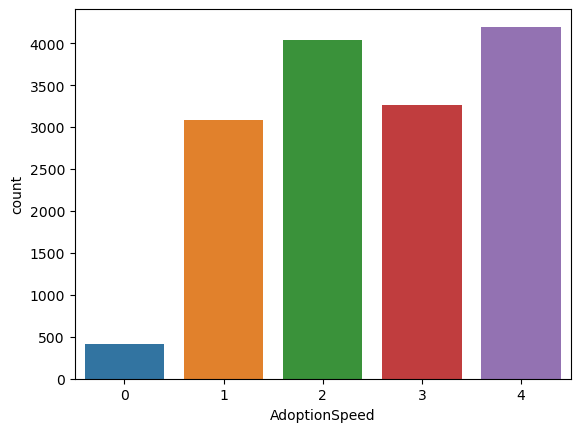

In [14]:
sns.countplot(pets_prepared, x="AdoptionSpeed")

In [328]:
pets_prepared['AdoptionSpeed'].value_counts()

AdoptionSpeed
4    4197
2    4037
3    3259
1    3090
0     410
Name: count, dtype: int64

It seems that most animals are adopted at AdoptionSpeed of 2 and 4 with 0 being the least

I create a copy of the pets_prepared dataframe, so that I will be able to freely modify the dataframe freely without modifying the original one 

In [3]:
df_EDA = pets_prepared.copy()

## Does the animal type affect the adoption speed/rate?

<Axes: xlabel='TypeName', ylabel='count'>

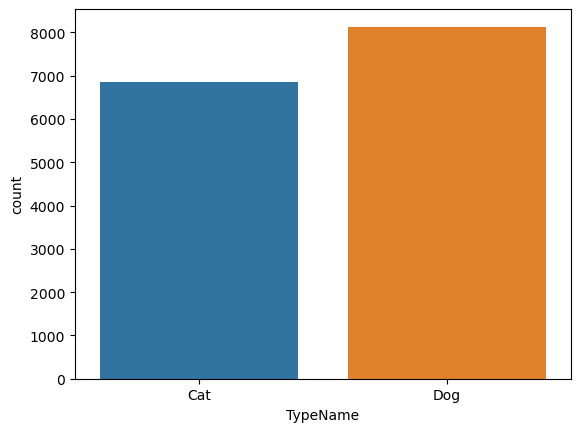

In [120]:
sns.countplot(data=df_EDA, x="TypeName")

We first check to see the count of each Cat and Dog to see if the data is biased towards one type, from here since the difference is not too huge, there isnt any bias

<Axes: xlabel='AdoptionSpeed', ylabel='count'>

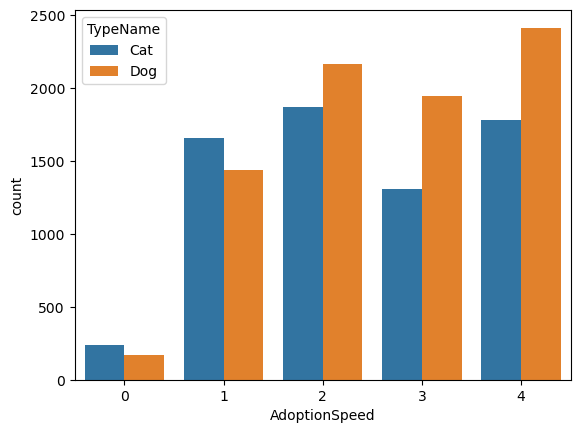

In [121]:
sns.countplot(data=df_EDA, x="AdoptionSpeed",hue="TypeName")

From the visualisation, since more Cats are adopted under the category of 0 and 1, this means that Cats are more likely to get adopted earlier within the same day or a week compared to the dogs while more dogs are adopted at a later time of category 2,3 and 4 which means Dogs are more likely to get adopted within the 1st and later months as compared to cats

## Does name affect adoption speed/rate?

Lets first check the percentage of missing names among the animals

In [122]:
df_EDA['Name'].isna().sum() / df_EDA.shape[0] * 100

0.053358233842459815

Only 0.05% of the animal does not not have a name which is a very small amount, lets check what is the most common name 

In [123]:
df_EDA['Name'].value_counts()

Name
No Name                   1311
Baby                        66
Lucky                       64
Brownie                     54
Mimi                        52
                          ... 
Maroo                        1
4 PUPPIES FOR ADOPTION       1
Trish                        1
Lab Mix Puppy 2              1
Fili                         1
Name: count, Length: 9059, dtype: int64

It seems like having no name is the most common among the animals, lets see if the top 6 names have any effects on the adoption rate

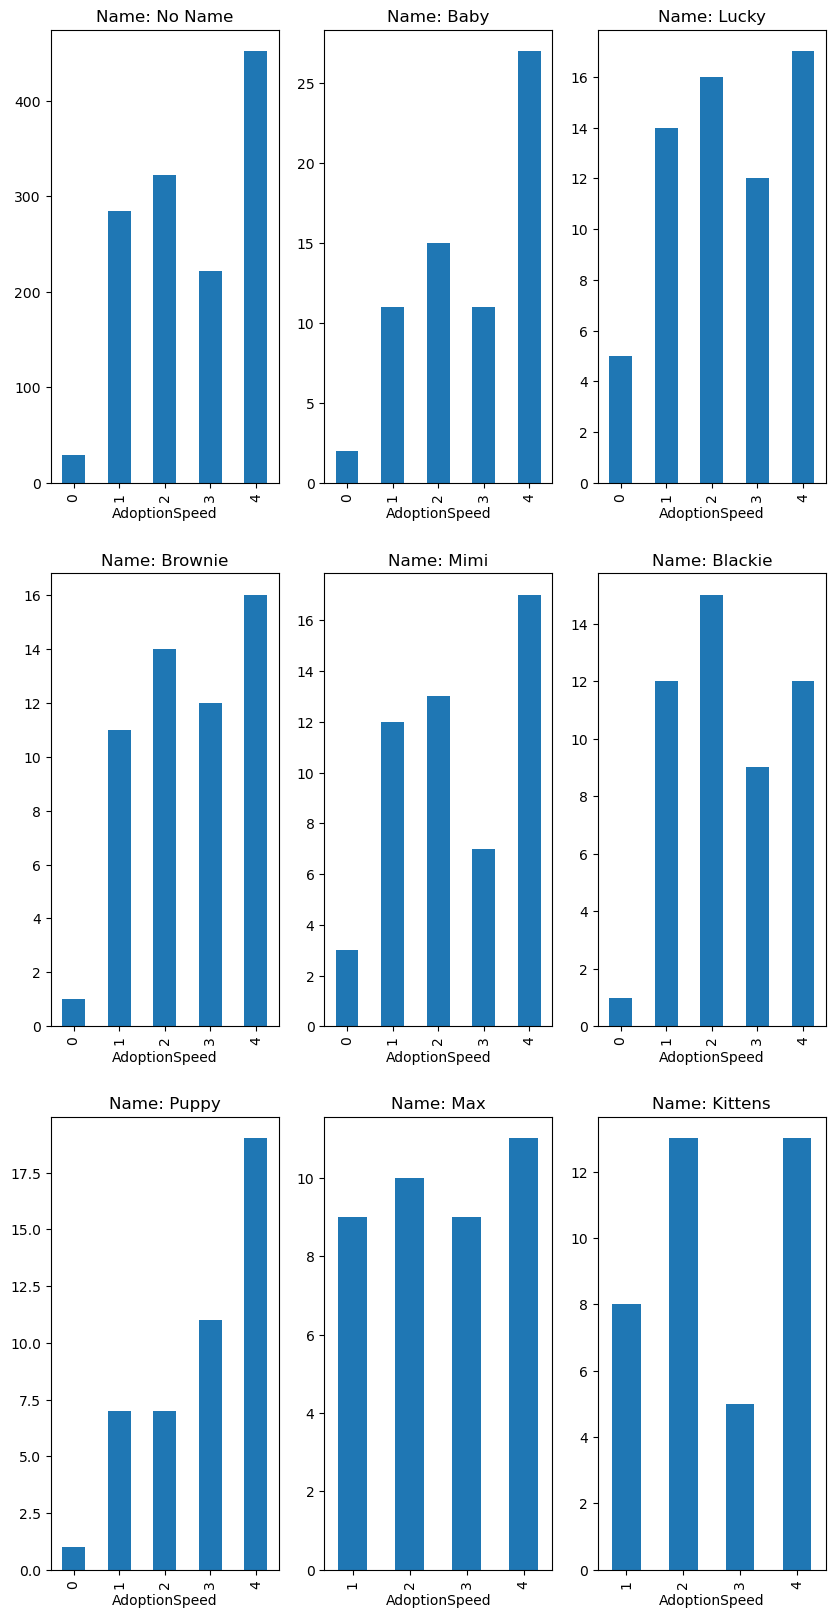

<Figure size 640x480 with 0 Axes>

In [124]:
fig,axes = plt.subplots(3,3,figsize=(10,20))
fig = plt.figure()
enum = 0
for index,value in df_EDA['Name'].value_counts()[:9].items():
    row,col=enum//3,enum%3
    ax = axes[row, col]
    temp = df_EDA[df_EDA['Name'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Name: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

Based on the top 9 names and their adoption rate, it follows quite closely to that of the overall adoption speed count plot. From code df_EDA['Name'].value_counts(), there are a total of 9059 unique names which makes it very difficult to encode as there are 9059 different categories, this makes the Name column potentially not useful as it significantly increase the dimensionality of the feature space. This could make it difficult for certain models to effectively capture the patterns which can result in potential computational inefficiency and overfitting. Instead, we should simplify it and look at whether animal have a name or not which is much easier

# Does having a name affect adoption speed/rate?

<Axes: xlabel='AdoptionSpeed', ylabel='count'>

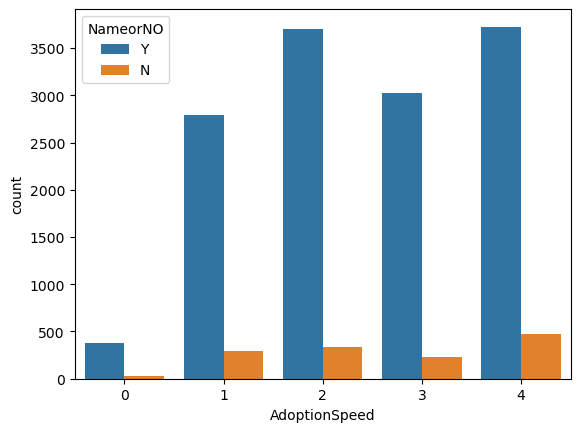

In [18]:
sns.countplot(data=df_EDA, x="AdoptionSpeed",hue="NameorNO")

In [20]:
df_EDA.groupby('NameorNO')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
NameorNO,,,,,,,,
N,1366.0,2.598097,1.223205,0.0,2.0,3.0,4.0,4.0
Y,13627.0,2.508256,1.172293,0.0,2.0,2.0,4.0,4.0


From the visualisation, Most of the animals are Named and it seems like having a name or no name have the same pattern, looking at the statistics, we do see a slight difference in the mean but not too much, it indicates that having a name has a slight effect in making adoption speed faster

# Does age affect the adoption speed/rate

First, check the distribution of age among the animals and see if there are any outliers

C:\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


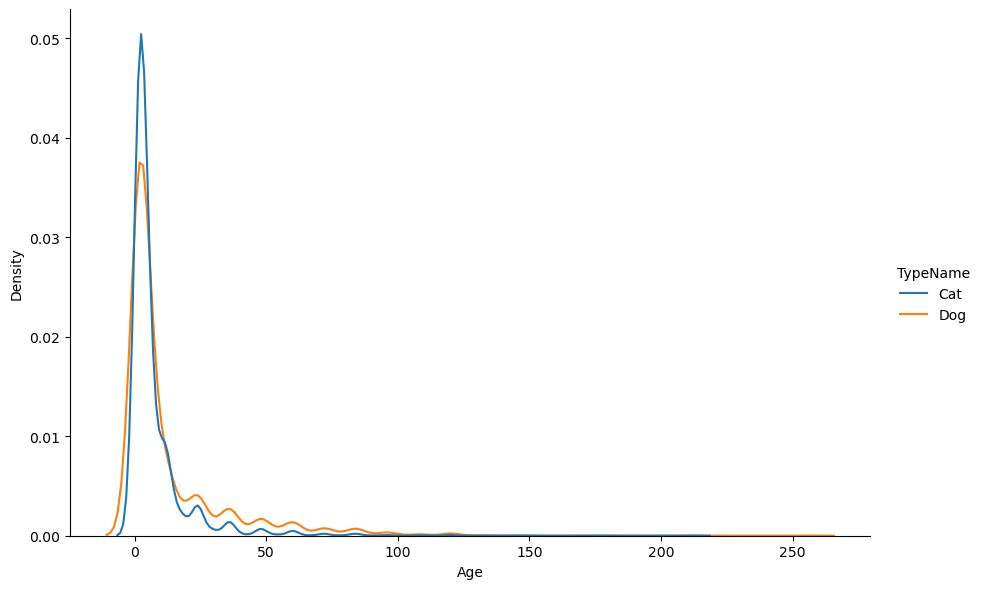

In [84]:
sns.displot(data=df_EDA, x="Age", hue='TypeName', kind="kde",height=6, aspect=1.5)

<Axes: xlabel='Age', ylabel='TypeName'>

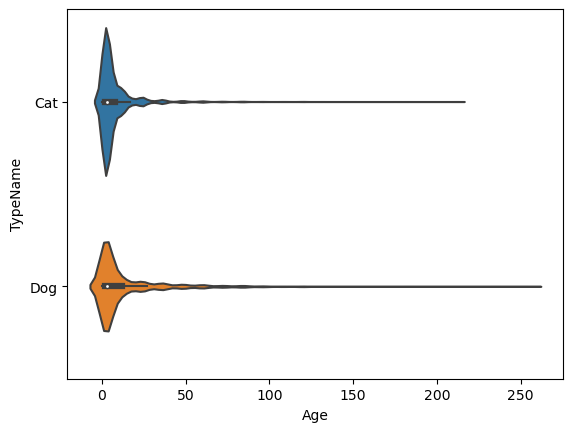

In [38]:
sns.violinplot(data=df_EDA, x="Age",y='TypeName')

In [127]:
df_EDA.groupby('TypeName')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
TypeName,,,,,,,,
Cat,6861.0,7.543361,12.771554,0.0,2.0,3.0,8.0,212.0
Dog,8132.0,12.906173,21.377588,0.0,2.0,3.0,12.0,255.0


Seems like cats have a lower mean age but its median is exactly the same as the dogs, so overall the cats seems to be younger as compared to the dogs, lets see if the age really affect the adoption rate

Text(0.5, 1.0, 'Dog')

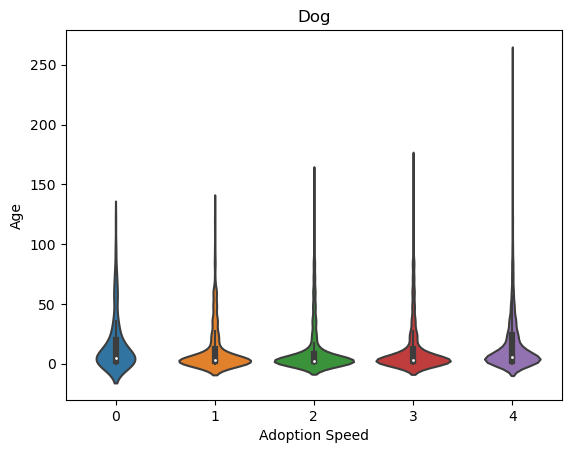

In [128]:
sns.violinplot(data=df_EDA[df_EDA['TypeName'] == 'Dog'], x="AdoptionSpeed", y="Age")
plt.xlabel("Adoption Speed")
plt.ylabel("Age")
plt.title("Dog")

Text(0.5, 1.0, 'Cat')

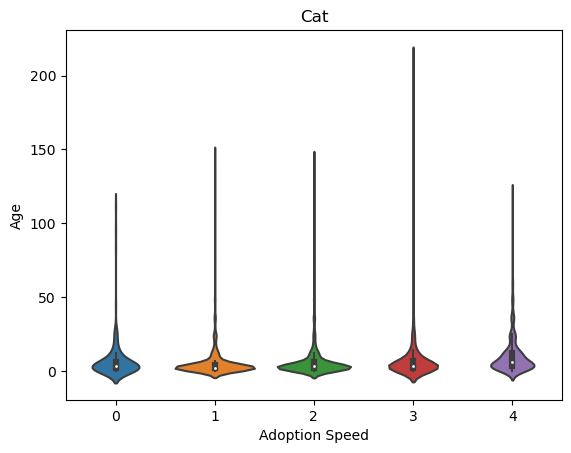

In [129]:
sns.violinplot(data=df_EDA[df_EDA['TypeName'] == 'Cat'], x="AdoptionSpeed", y="Age")
plt.xlabel("Adoption Speed")
plt.ylabel("Age")
plt.title("Cat")

In [130]:
df_EDA.groupby(['TypeName','AdoptionSpeed'])['Age'].describe()

count       mean        std  min  25%  50%    75%  \
TypeName AdoptionSpeed                                                       
Cat      0               240.0   6.633333  12.254234  0.0  2.0  3.0   6.00   
         1              1655.0   5.537764  10.124658  0.0  2.0  2.0   4.00   
         2              1873.0   6.312333  10.790752  0.0  2.0  3.0   6.00   
         3              1310.0   7.775573  15.724617  0.0  2.0  3.0   7.00   
         4              1783.0  10.650028  13.912013  0.0  3.0  6.0  12.00   
Dog      0               170.0  15.841176  22.413372  0.0  2.0  4.5  20.25   
         1              1435.0  11.891289  19.855107  0.0  2.0  3.0  12.00   
         2              2164.0  10.997227  20.355872  0.0  2.0  2.0   8.00   
         3              1949.0  11.812724  20.258299  0.0  2.0  3.0  12.00   
         4              2414.0  15.896852  23.523003  0.0  2.0  6.0  24.00   

                          max  
TypeName AdoptionSpeed         
Cat      0              112.0  
         1              147.0  
         2              144.0  
         3              212.0  
         4              120.0  
Dog      0              120.0  
         1              132.0  
         2              156.0  
         3              168.0  
         4              255.0

In [131]:
from scipy.stats import f_oneway

adoption_speed_0 = df_EDA[df_EDA['AdoptionSpeed'] == 0]['Age']
adoption_speed_1 = df_EDA[df_EDA['AdoptionSpeed'] == 1]['Age']
adoption_speed_2 = df_EDA[df_EDA['AdoptionSpeed'] == 2]['Age']
adoption_speed_3 = df_EDA[df_EDA['AdoptionSpeed'] == 3]['Age']
adoption_speed_4 = df_EDA[df_EDA['AdoptionSpeed'] == 4]['Age']

f_statistic, p_value = f_oneway(adoption_speed_0, adoption_speed_1, adoption_speed_2, adoption_speed_3, adoption_speed_4)

print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 50.91240908416059
p-value: 1.2080269798100195e-42


Based on the visualisation and the statistics above, we can see that since the p value is extremely small and lower than the critical value of 0.05, we can conclude that age do plays apart in the adoption speed and in general, animals with lower age for both dogs and cats tends to get adopted at a fast speed and with lower AdoptionSpeed

## To further confirm this, lets try looking at the AgeBins

In [85]:
df_EDA['AgeBins'].value_counts()

AgeBins
[  3,  6)    3670
2            3503
[  0,  2)    2483
[ 24, 60)    1601
[  6, 12)    1588
[ 12, 24)    1557
[ 60,255]     591
Name: count, dtype: int64

As expected, seems like most of the animals are still pretty young from 0-6 months being most common

In [87]:
df_EDA.groupby(['AgeBins'])['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeBins,,,,,,,,
2,3503.0,2.264916,1.113512,0.0,1.0,2.0,3.0,4.0
"[ 0, 2)",2483.0,2.195328,1.083959,0.0,1.0,2.0,3.0,4.0
"[ 3, 6)",3670.0,2.548774,1.146976,0.0,2.0,3.0,4.0,4.0
"[ 6, 12)",1588.0,2.834383,1.179921,0.0,2.0,3.0,4.0,4.0
"[ 12, 24)",1557.0,2.834939,1.229087,0.0,2.0,3.0,4.0,4.0
"[ 24, 60)",1601.0,2.816989,1.221008,0.0,2.0,3.0,4.0,4.0
"[ 60,255]",591.0,2.648054,1.159190,0.0,2.0,3.0,4.0,4.0


As proven on top, it does seems like the younger animals tends to get adopted at a faster speed compared to older animals.

## Does breed affect the adoption speed/rate

In [46]:
df_merge = df_EDA.merge(breed_labels,how='left',left_on=['Breed2','Type'],right_on=['BreedID','Type'])

In [47]:
df_merge.columns

Index(['PetID', 'AdoptionSpeed', 'Type', 'Name', 'Age', 'Breed1', 'Breed2',
       'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt', 'PhotoAmt', 'Description', 'AgeBins',
       'FeeBins', 'BreedBins', 'StateBins', 'VideoAmtBins', 'PhotoAmtBins',
       'QuantityBins', 'BreedPure', 'ColorAmt', 'NameorNO', 'Adopted',
       'TypeName', 'GenderName', 'MaturitySizeName', 'FurLengthName',
       'HealthName', 'VaccinatedName', 'DewormedName', 'SterilizedName',
       'BreedName_x', 'BreedBinsName', 'StateName', 'StateBinsName',
       'ColorName', 'AdoptedName', 'Color1Name', 'Color2Name', 'Color3Name',
       'BreedID', 'BreedName_y'],
      dtype='object')

### Exploring for dogs first 

In [49]:
df_merge['BreedName_x'].isna().sum()

5

From previously found, there are 5 missing BreedName

In [48]:
# this is for breed1 name
df_merge[df_merge['Type'] == 1]['BreedName_x'].value_counts()

BreedName_x
Mixed Breed                     5923
Labrador Retriever               205
Shih Tzu                         189
Poodle                           167
Terrier                          161
                                ... 
Mountain Dog                       1
Samoyed                            1
Chocolate Labrador Retriever       1
Kuvasz                             1
Dutch Shepherd                     1
Name: count, Length: 115, dtype: int64

In [132]:
# this is for breed2 name
df_merge[df_merge['Type'] == 1]['BreedName_y'].value_counts()

BreedName_y
Mixed Breed            1727
Terrier                  90
Labrador Retriever       86
German Shepherd Dog      55
Spitz                    49
                       ... 
Border Terrier            1
Norfolk Terrier           1
Irish Setter              1
Saint Bernard             1
Akita                     1
Name: count, Length: 83, dtype: int64

In [103]:
df_EDA['Breed2'].value_counts()

Breed2
0      10762
307     1727
266      599
265      321
299      138
       ...  
104        1
36         1
17         1
257        1
279        1
Name: count, Length: 135, dtype: int64

Looking at this, it seems like most dogs are actually mixed breeds according to breed1, the breed2 being 0 having the highest count is due to dogs either being pure breed or people after putting breed1 as mixed breed, left the breed 2 type as empty which lead to Breed 2 being 0, some people also put mixed breed in Breed2 as well. This potentially means we can do some modification to this feature to improve it

### Exploring for cats now

In [134]:
# this is for breed1 name
df_merge[df_merge['Type'] == 2]['BreedName_x'].value_counts()

BreedName_x
Domestic Short Hair      3634
Domestic Medium Hair     1258
Tabby                     342
Domestic Long Hair        296
Siamese                   264
                         ... 
Shih Tzu                    1
Sphynx (hairless cat)       1
Greyhound                   1
Torbie                      1
Ragamuffin                  1
Name: count, Length: 67, dtype: int64

In [135]:
# this is for breed2 name
df_merge[df_merge['Type'] == 2]['BreedName_y'].value_counts()

BreedName_y
Domestic Short Hair     599
Domestic Medium Hair    321
Tabby                   138
Domestic Long Hair      125
Siamese                 105
Persian                  78
Calico                   42
Bengal                   39
American Shorthair       30
Oriental Short Hair      24
Tuxedo                   24
Tortoiseshell            24
Maine Coon               22
Burmese                  18
British Shorthair        11
Abyssinian               10
Tiger                     9
Singapura                 8
Ragdoll                   8
Bobtail                   6
Turkish Van               6
Exotic Shorthair          6
Egyptian Mau              5
Balinese                  5
Bombay                    4
Himalayan                 4
Silver                    4
American Curl             4
Birman                    4
Snowshoe                  3
Oriental Long Hair        3
Russian Blue              3
Chartreux                 3
Munchkin                  3
Applehead Siamese         3
Torbie  

In [107]:
# This is for Breed2 ID
df_merge[df_merge['Type'] == 2]['Breed2'].value_counts()

Breed2
0      5135
266     599
265     321
299     138
264     125
292     105
285      78
254      42
247      39
243      30
283      24
303      24
306      24
276      22
252      18
251      11
241      10
300       9
295       8
288       8
249       6
268       6
305       6
246       5
267       5
250       4
271       4
294       4
242       4
248       4
282       3
296       3
289       3
278       3
256       3
245       3
302       2
274       2
284       2
272       2
277       2
270       2
260       1
290       1
304       1
218       1
257       1
263       1
5         1
262       1
291       1
21        1
301       1
293       1
279       1
Name: count, dtype: int64

For cats, it seems like most people would just put the breed as the length of the hair of the cats, with domestic short hair and domestic medium hair being the most, but in breed2, similar to dogs, most did not put the breed and place it as empty, and in this case means if cat is pure breed, then the breed2 is 0. In conclusion, it seems like most cats are pure breed while most dogs are mixed breed

### Lets try to visualise the top 9 breeds in breed1 against the adoption speed

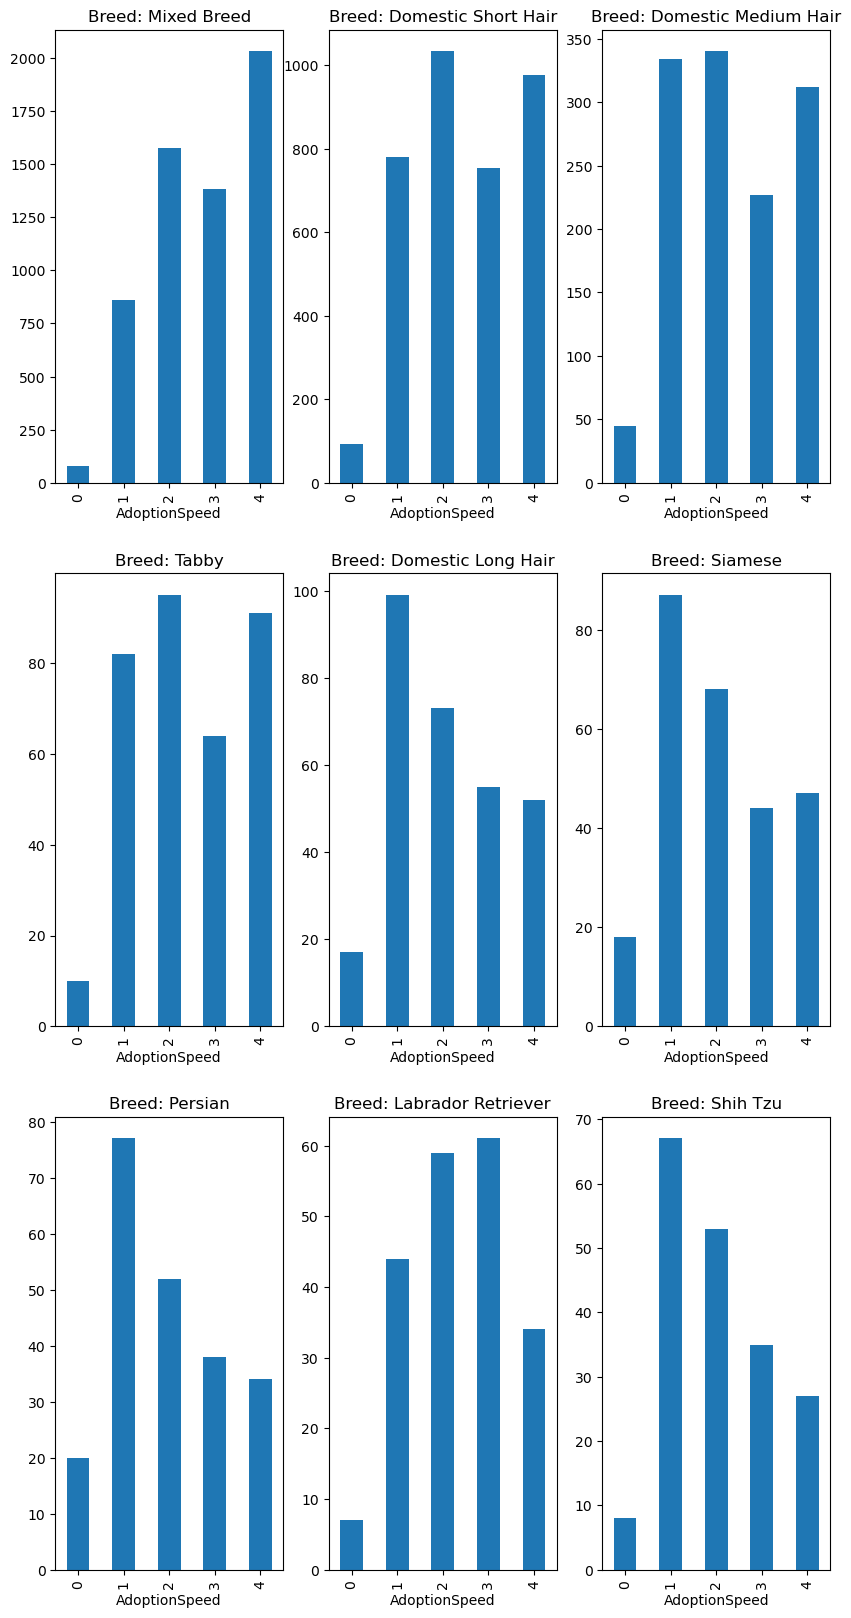

<Figure size 640x480 with 0 Axes>

In [109]:
fig,axes = plt.subplots(3,3,figsize=(10,20))
fig = plt.figure()
enum = 0
for index,value in df_merge['BreedName_x'].value_counts()[:9].items():
    row,col=enum//3,enum%3
    ax = axes[row, col]
    temp = df_merge[df_merge['BreedName_x'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Breed: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

From here, we can see that breed might potentially plays apart in determining the adoption speed because for the top 9 visualisation, most of them does not follow the overall trend, it means that it is able to capture patterns that are beyond what is already captured

### Lets see does being a mixed/pure breed affect adopting speed

In [54]:
df_EDA['BreedPure'].value_counts()

BreedPure
N    8259
Y    6734
Name: count, dtype: int64

In [55]:
df_EDA.groupby('TypeName')['BreedPure'].value_counts()

TypeName  BreedPure
Cat       Y            5565
          N            1296
Dog       N            6963
          Y            1169
Name: count, dtype: int64

Most animal are pure breed and I was right from above where Most of the dogs are pure breed while most of the cats is pure breed

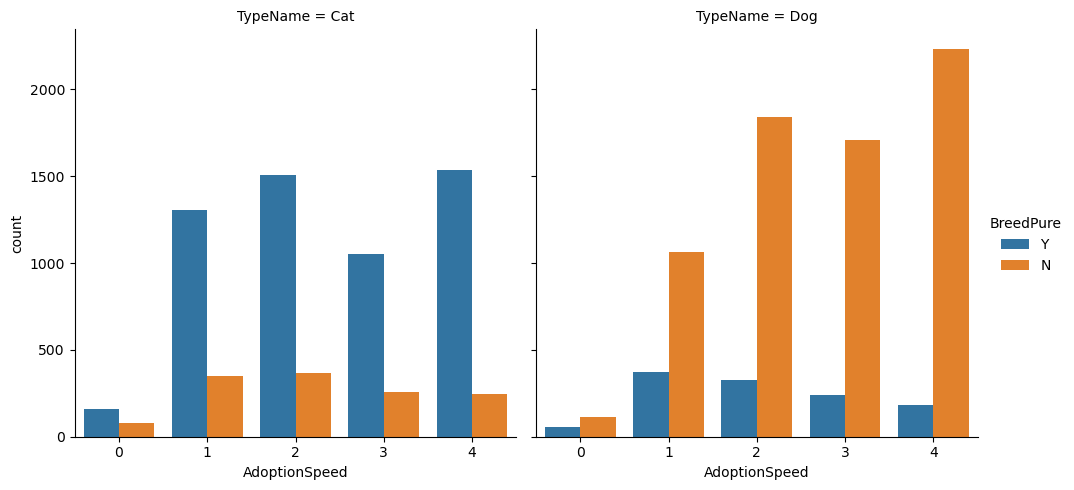

In [61]:
sns.catplot(data=df_EDA,x='AdoptionSpeed',kind='count',col='TypeName',hue='BreedPure')

I decide to do 2 visualisation for each dog and cat to ensure that I have a better picture of the spread across the pure breed as well as the animal type. From here, we can see that for cats, It seems like mixed breed are adopted at a faster than that of pure breed cats while for Dogs, more pure breed are adopted at a faster rate compared to mixed Breed.

<Axes: xlabel='AdoptionSpeed', ylabel='count'>

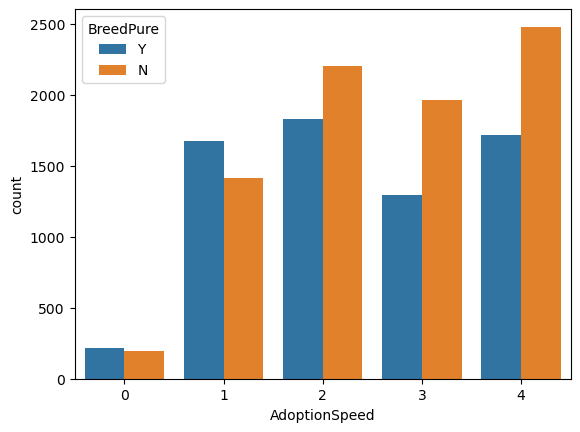

In [62]:
sns.countplot(data=df_EDA,x='AdoptionSpeed',hue='BreedPure')

Comparing both animal type combined, it does seems like pure breed animal tends to get adopted faster than that of mixed breed animals as a higher percentage of pure breed animals falls under category 1,2,4 while for mixed breed, most animals fall under 2,3,4. Now lets actually see the statistics because it is important we take total count of each category into account

In [63]:
df_EDA.groupby('BreedPure').AdoptionSpeed.describe()

,count,mean,std,min,25%,50%,75%,max
BreedPure,,,,,,,,
N,8259.0,2.620293,1.148948,0.0,2.0,3.0,4.0,4.0
Y,6734.0,2.389070,1.198955,0.0,1.0,2.0,4.0,4.0


Based on the statistics, our finding is right whereby pure breed animals are adopted faster than mixed breed

### Now, from what I have gathered from above, lets see if we can acutally improve on the Breed1 better

I will try to standardise whereby if people put breed1 as mixed breed, then breed2 should be mixed breed(307) as well

In [138]:
pets_prepared['Breed2'] = pets_prepared.apply(lambda row: 307 if row['Breed1'] == 307 else row['Breed2'], axis=1)

In [139]:
pets_prepared['Breed1'].value_counts()

Breed1
307    5927
266    3634
265    1258
299     342
264     296
       ... 
176       1
214       1
125       1
123       1
81        1
Name: count, Length: 176, dtype: int64

In [140]:
pets_prepared['Breed2'].value_counts()

Breed2
307    6651
0      6227
266     599
265     321
299     138
       ... 
2         1
17        1
24        1
257       1
279       1
Name: count, Length: 121, dtype: int64

Now, if we look at this 2 value counts, the mixed breed in Breed2 seems to be larger than in Breed1, after looking through the file, it seems that some people put breed1 as a specific breed other than mixed breed but in breed2 they also put it as mixed breed and vice versa, so this result in Breed2 having more MixedBreed which makes the data more confusing, hence I think I should not modify this data and keep it the same

In [141]:
pets_prepared = pd.read_csv("../Technical Assessment/data/pets_prepared.csv")

## We can see issues arising from the fact there are simply too many species and some species are just too under representated, Lets use BreedBins and see if this is a better feature to use

In [5]:
df_EDA['BreedBinsName'].value_counts()

BreedBinsName
Mixed Breed             5927
Domestic Short Hair     3634
Others                  3272
Domestic Medium Hair    1258
Tabby                    342
Domestic Long Hair       296
Siamese                  264
Name: count, dtype: int64

In [6]:
# For dogs
df_EDA[df_EDA['Type'] == 1]['BreedBinsName'].value_counts()

BreedBinsName
Mixed Breed    5923
Others         2209
Name: count, dtype: int64

Without diving further, Using BreedBinsName instead might be too generalised because for the case of dogs, only mixed Breed are taken into account while other species falls under Others. Hence, we should keep the breeds

## Does Gender affect adoption rate/speed

<Axes: xlabel='GenderName', ylabel='count'>

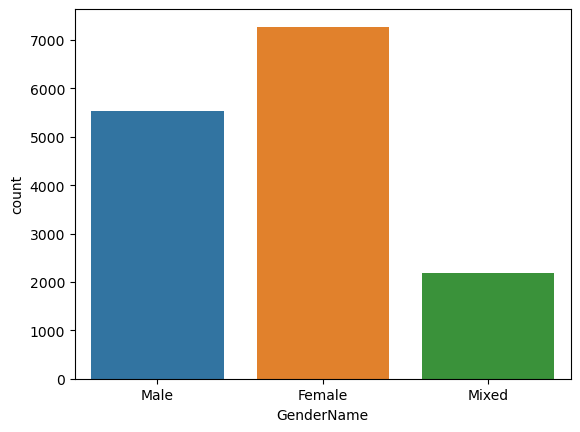

In [145]:
sns.countplot(data=df_EDA,x='GenderName')

Seems like most of the animals are Female, followed by male and mixed

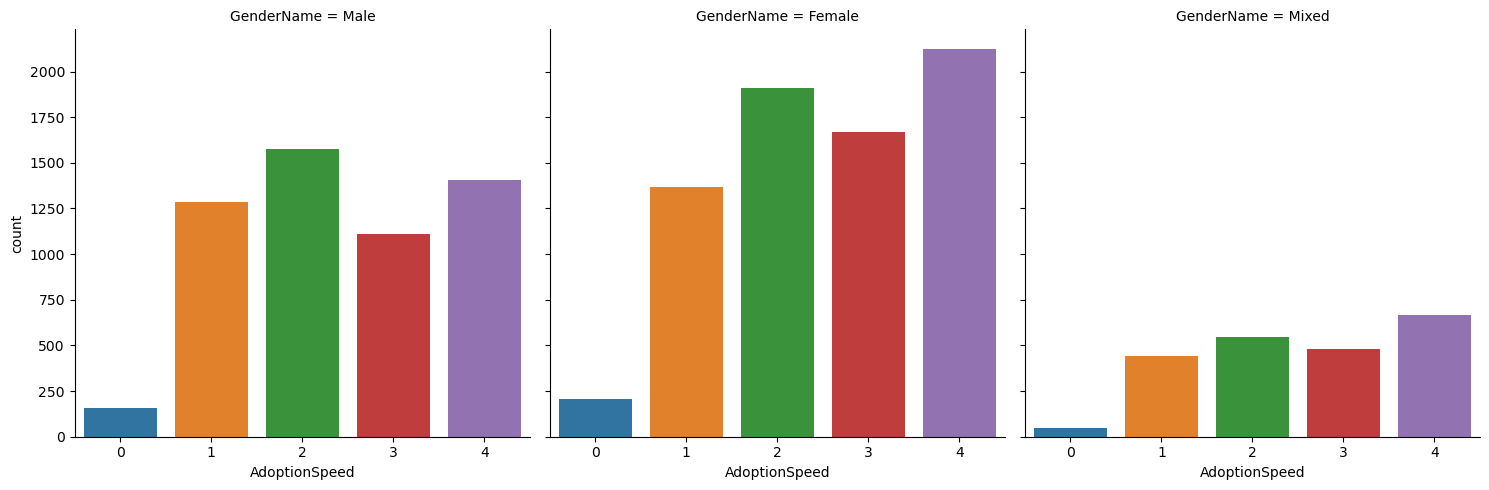

In [12]:
sns.catplot(
    data=df_EDA, x="AdoptionSpeed", col="GenderName",
    kind="count"
)

In [148]:
df_EDA.groupby(['GenderName'])['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
GenderName,,,,,,,,
Female,7277.0,2.569878,1.171737,0.0,2.0,3.0,4.0,4.0
Male,5536.0,2.418714,1.178352,0.0,1.0,2.0,4.0,4.0
Mixed,2180.0,2.586239,1.177030,0.0,2.0,3.0,4.0,4.0


From the statistics here, we can see that Male animals tend to get adopted at a faster adoption speed, however, the adoption speed are pretty close across all the Genders

## Does Color affect adoption speed/rate

In [101]:
dict = {0:'No_Color',1:'Black',2:'Brown',3:'Golden',4:'Yellow',5:'Cream',6:'Gray',7:'White'}
df_EDA['Color2Name'] = df_EDA['Color2'].map(dict)
df_EDA['Color3Name'] = df_EDA['Color3'].map(dict)

In [102]:
df_EDA['ColorName'].value_counts()

ColorName
Black     7427
Brown     3750
Golden     947
Cream      884
Gray       684
White      667
Yellow     634
Name: count, dtype: int64

Based on here, it seems like Black and Brown seems to be the most popular color for Color1 and Yellow and White being the least popular

In [24]:
df_EDA['Color2Name'].value_counts()

Color2Name
No_Color    4471
White       3438
Brown       3313
Cream       1128
Gray        1063
Yellow       870
Golden       710
Name: count, dtype: int64

Based on here, it seems like No Color and White seems to be the most popular color for Color2 and Yellow and Golden being the least popular

In [25]:
df_EDA['Color3Name'].value_counts()

Color3Name
No_Color    10604
White        3221
Cream         417
Gray          378
Yellow        198
Golden        175
Name: count, dtype: int64

Based on here, it seems like No Color and White seems to be the most popular color for Color2 and Yellow and Golden being the least popular

We can concluded that most animals have 2 colors where their primary colors are likely to be Black and Brown, and secondary and third colour being white

### Color1 and AdoptionSPeed

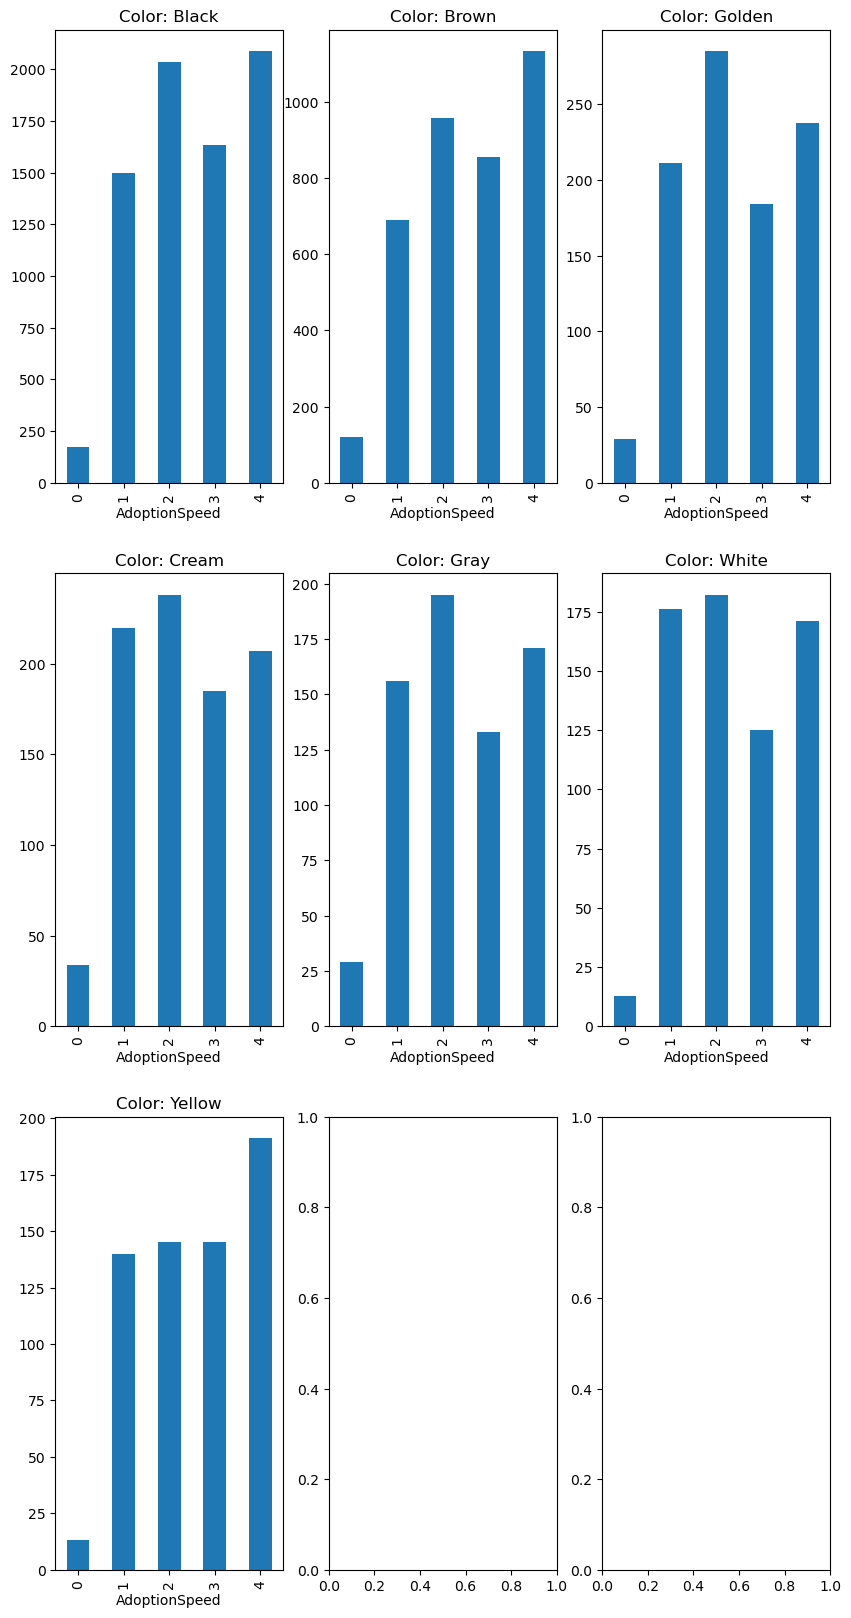

<Figure size 640x480 with 0 Axes>

In [103]:
fig,axes = plt.subplots(3,3,figsize=(10,20))
fig = plt.figure()
enum = 0
for index,value in df_EDA['ColorName'].value_counts().items():
    row,col=enum//3,enum%3
    ax = axes[row, col]
    temp = df_EDA[df_EDA['ColorName'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Color: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

### Color2 and AdoptionSpeed

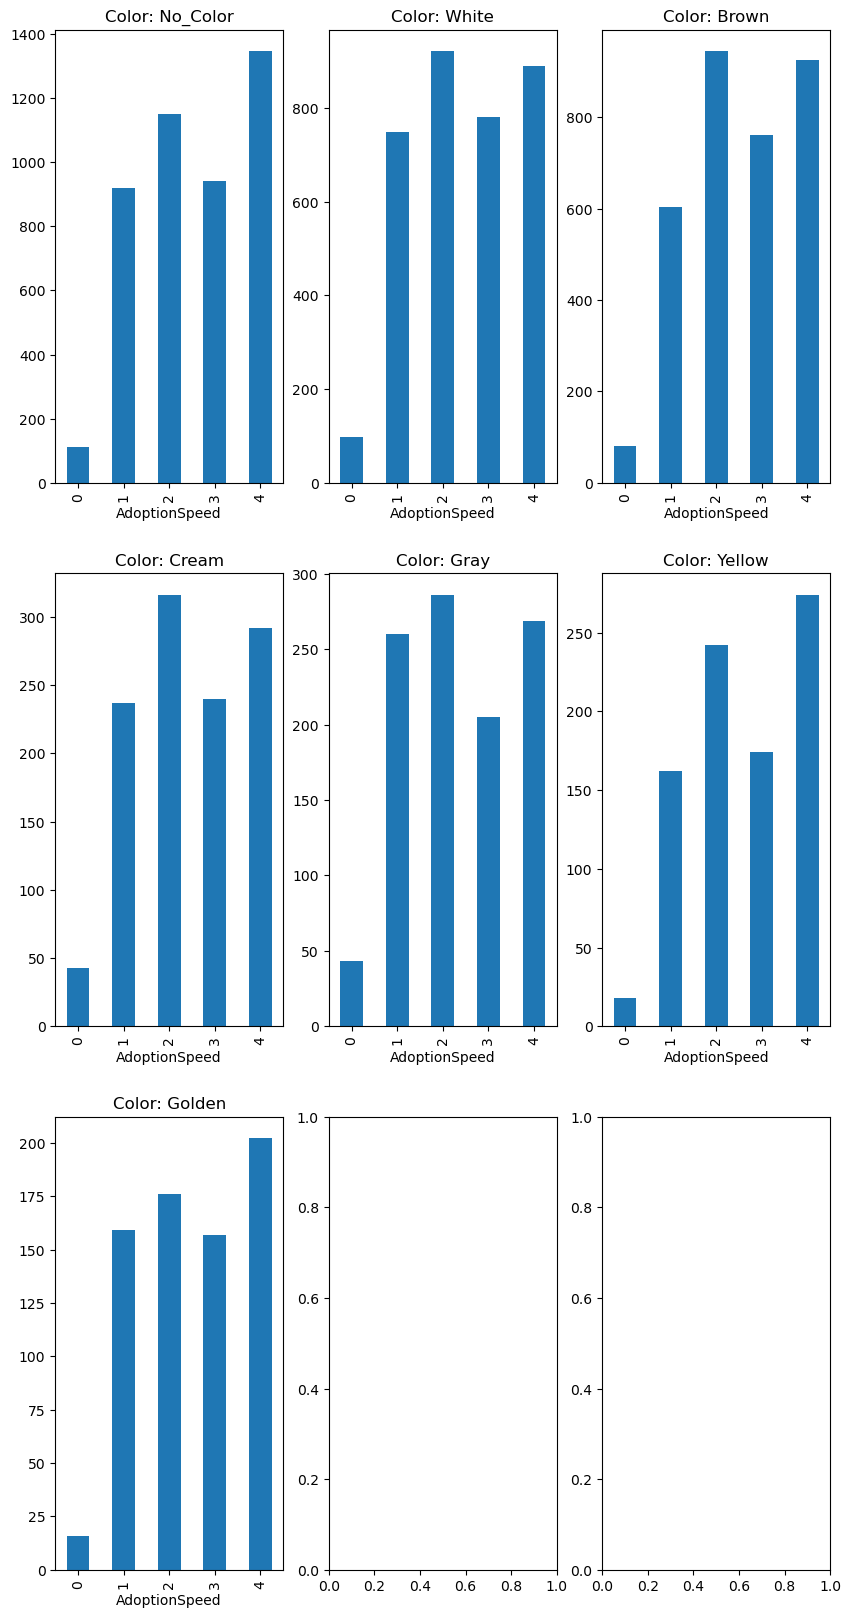

<Figure size 640x480 with 0 Axes>

In [28]:
fig,axes = plt.subplots(3,3,figsize=(10,20))
fig = plt.figure()
enum = 0
for index,value in df_EDA['Color2Name'].value_counts().items():
    row,col=enum//3,enum%3
    ax = axes[row, col]
    temp = df_EDA[df_EDA['Color2Name'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Color: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

Based on the visualisation of color1 and color2, it do seems like the different color might potentially plays apart in affecting AdoptionSpeed but not too much, looking at statistics might be a better help

In [29]:
df_EDA.groupby('Color1Name')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
Color1Name,,,,,,,,
Black,7427.0,2.533594,1.163706,0.0,2.0,3.0,4.00,4.0
Brown,3750.0,2.584267,1.185274,0.0,2.0,3.0,4.00,4.0
Cream,884.0,2.351810,1.194356,0.0,1.0,2.0,3.00,4.0
Golden,947.0,2.412883,1.172970,0.0,1.0,2.0,4.00,4.0
Gray,684.0,2.381579,1.203587,0.0,1.0,2.0,3.25,4.0
White,667.0,2.397301,1.182781,0.0,1.0,2.0,4.00,4.0
Yellow,634.0,2.569401,1.189373,0.0,2.0,3.0,4.00,4.0


In [30]:
df_EDA.groupby('Color2Name')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
Color2Name,,,,,,,,
Brown,3313.0,2.557803,1.146458,0.0,2.0,3.0,4.0,4.0
Cream,1128.0,2.444149,1.189454,0.0,2.0,2.0,4.0,4.0
Golden,710.0,2.521127,1.184755,0.0,2.0,3.0,4.0,4.0
Gray,1063.0,2.373471,1.213830,0.0,1.0,2.0,4.0,4.0
No_Color,4471.0,2.556699,1.187875,0.0,2.0,3.0,4.0,4.0
White,3438.0,2.469459,1.171911,0.0,2.0,2.0,4.0,4.0
Yellow,870.0,2.602299,1.169420,0.0,2.0,3.0,4.0,4.0


In [31]:
df_EDA.groupby('Color3Name')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
Color3Name,,,,,,,,
Cream,417.0,2.467626,1.222597,0.0,1.0,3.0,4.00,4.0
Golden,175.0,2.582857,1.209513,0.0,2.0,3.0,4.00,4.0
Gray,378.0,2.423280,1.163407,0.0,2.0,2.0,3.75,4.0
No_Color,10604.0,2.519804,1.172673,0.0,2.0,2.0,4.00,4.0
White,3221.0,2.503570,1.184686,0.0,2.0,2.0,4.00,4.0
Yellow,198.0,2.767677,1.177869,0.0,2.0,3.0,4.00,4.0


Based on the visualisation, it do seems like color might play apart since the mean of AdoptionSpeed across different colors are different despite being close,for color1, Cream seems to be adopted the fastest among the rest, for color2 is Gray and for color3 is  Gray

## Does color count affect adoption rate/speed?

<Axes: xlabel='ColorAmt', ylabel='count'>

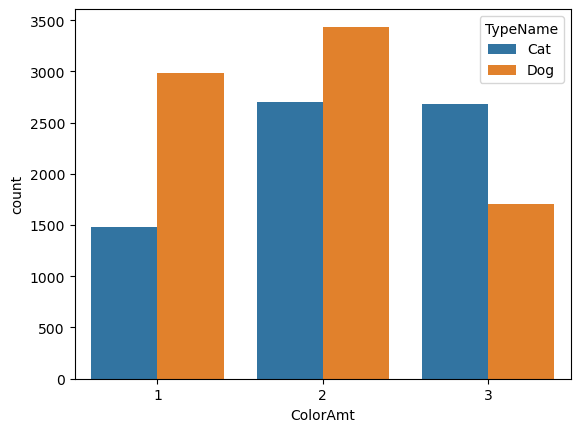

In [73]:
sns.countplot(data=df_EDA,x='ColorAmt',hue='TypeName')

In [72]:
df_EDA['ColorAmt'].value_counts()

ColorAmt
2    6133
1    4471
3    4389
Name: count, dtype: int64

For both Cat and Dog, most of them have 2 colors, but for dogs, the 2nd highest is only 1 color followed by 3 colors while for cats the 2nd highest is 3 colors followed by 1

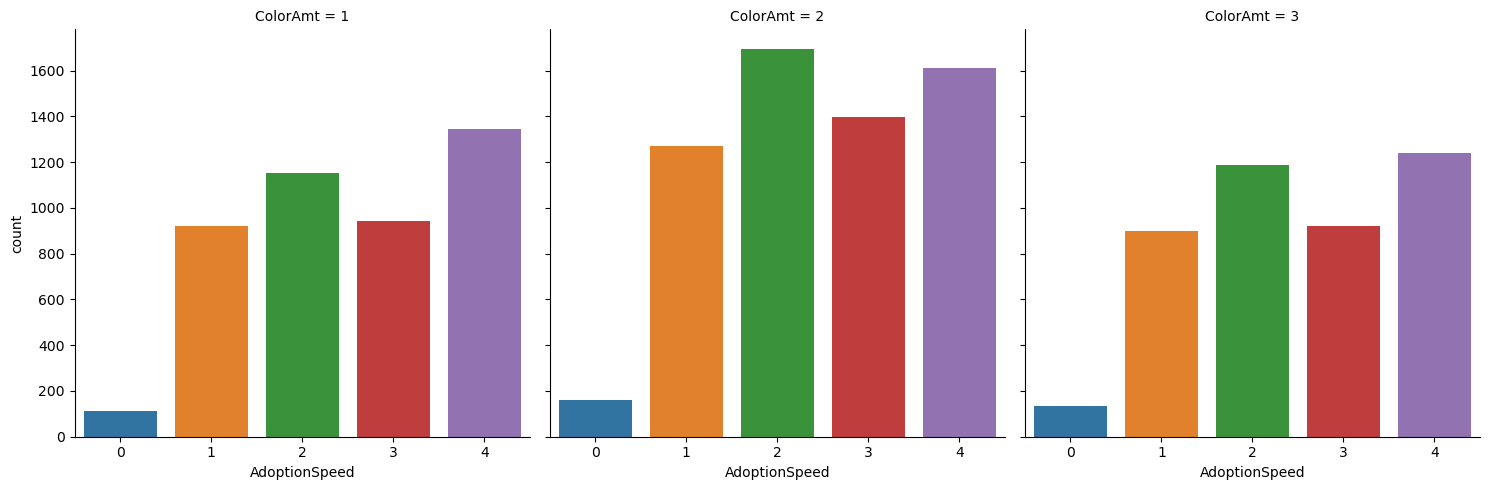

In [68]:
sns.catplot(
    data=df_EDA, x="AdoptionSpeed", col="ColorAmt",
    kind="count"
)

In [65]:
df_EDA.groupby('ColorAmt')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
ColorAmt,,,,,,,,
1,4471.0,2.556699,1.187875,0.0,2.0,3.0,4.0,4.0
2,6133.0,2.492907,1.160824,0.0,2.0,2.0,4.0,4.0
3,4389.0,2.508316,1.188381,0.0,2.0,2.0,4.0,4.0


From the visualisation itself, it is very hard to see whether color amount affect adoption speed. Using the statistics, it seems that color amount 2 has the lowest mean adoption speed followed by color amount 3 then 1, which mean animals having color amount 2 is likely to get adopted the fastest

## Does MaturitySize affect adoption speed/rate?

<Axes: xlabel='MaturitySizeName', ylabel='count'>

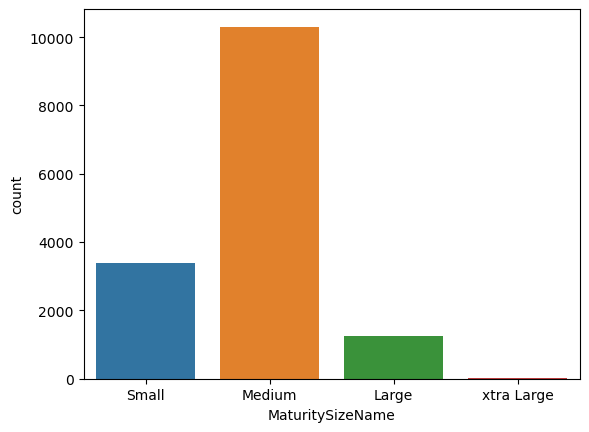

In [121]:
sns.countplot(data=df_EDA,x='MaturitySizeName')

Most animals have maturitySize Medium(2) and the least being MaturitySize xtra Large(4)

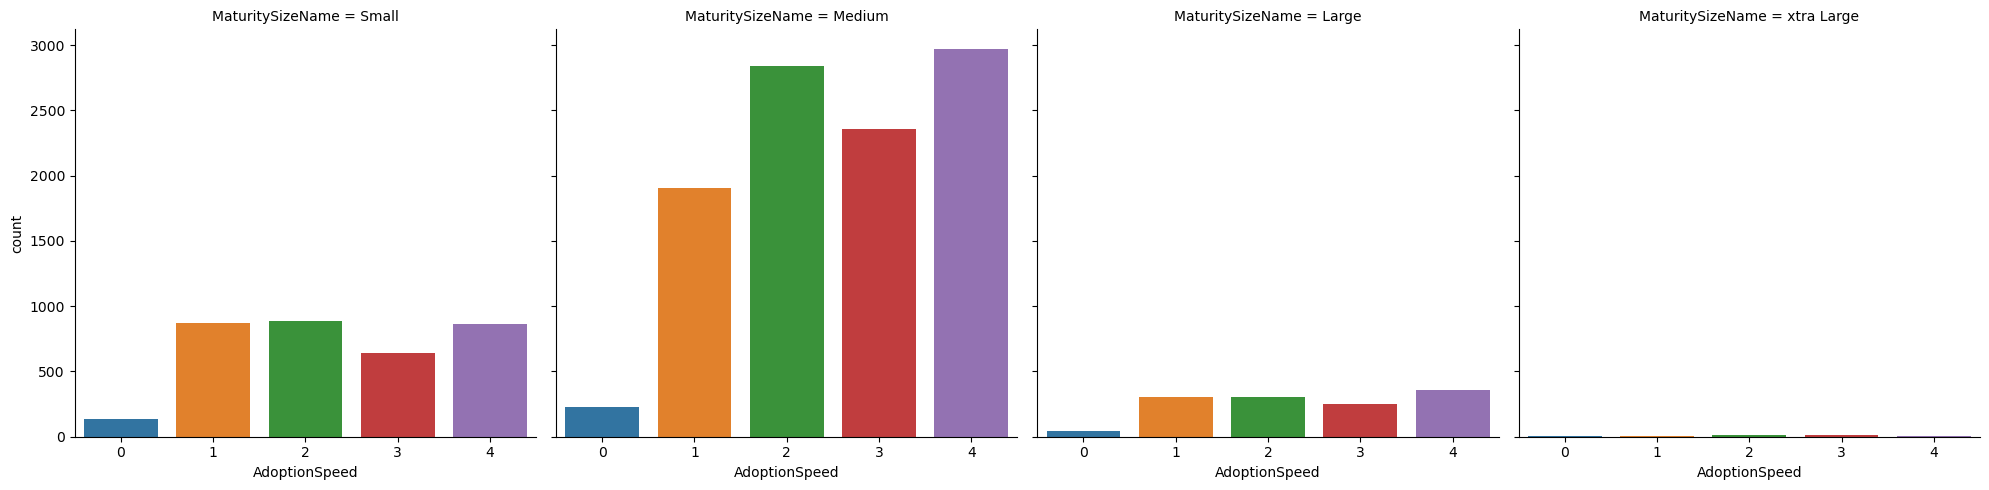

In [122]:
sns.catplot(
    data=df_EDA, x="AdoptionSpeed", col="MaturitySizeName",
    kind="count"
)

It is quite difficult to see the trend in AdoptionSpeed Large and xtra Large, I am going to expand the visualisation for those 2

Text(0.5, 1.0, 'Adoption Speed for Maturity Size Large')

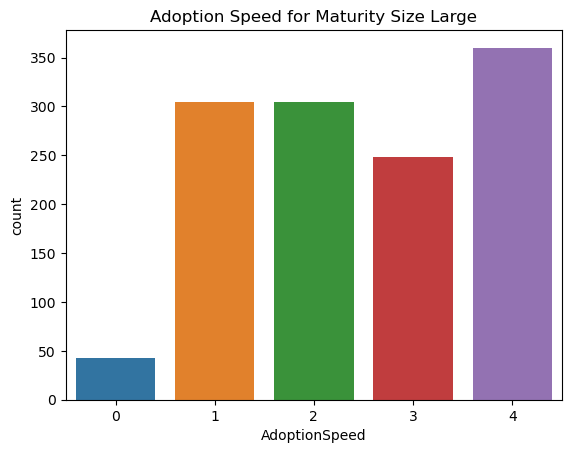

In [124]:
sns.countplot(data=df_EDA[df_EDA['MaturitySizeName'] == 'Large'],x='AdoptionSpeed')
plt.title('Adoption Speed for Maturity Size Large')

Text(0.5, 1.0, 'Adoption Speed for Maturity Size xtra Large')

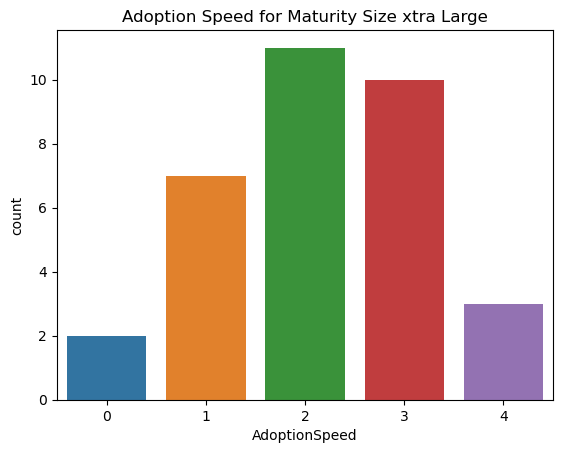

In [125]:
sns.countplot(data=df_EDA[df_EDA['MaturitySizeName'] == 'xtra Large'],x='AdoptionSpeed')
plt.title('Adoption Speed for Maturity Size xtra Large')

In [126]:
df_EDA.groupby('MaturitySizeName').AdoptionSpeed.describe()

,count,mean,std,min,25%,50%,75%,max
MaturitySizeName,,,,,,,,
Large,1260.0,2.458730,1.228098,0.0,1.0,2.0,4.0,4.0
Medium,10305.0,2.576904,1.150349,0.0,2.0,3.0,4.0,4.0
Small,3395.0,2.357879,1.222961,0.0,1.0,2.0,4.0,4.0
xtra Large,33.0,2.151515,1.064225,0.0,1.0,2.0,3.0,4.0


From the statistics and visualisation, we can see that animals with MaturitySize xtra Large(4) tends to get adopted at a faster rate followed by Small(1) then Large(3) then Medium(2), but this could also be due to the fact that the count is very small for MaturitySize xtra Large(4)

## Does FurLength affect adoption rate/speed

In [118]:
df_EDA['FurLengthName'].value_counts()

FurLengthName
Small     8808
Medium    5361
Long       824
Name: count, dtype: int64

We can see that most animals have FurLength of 1 followed by 2 then 3

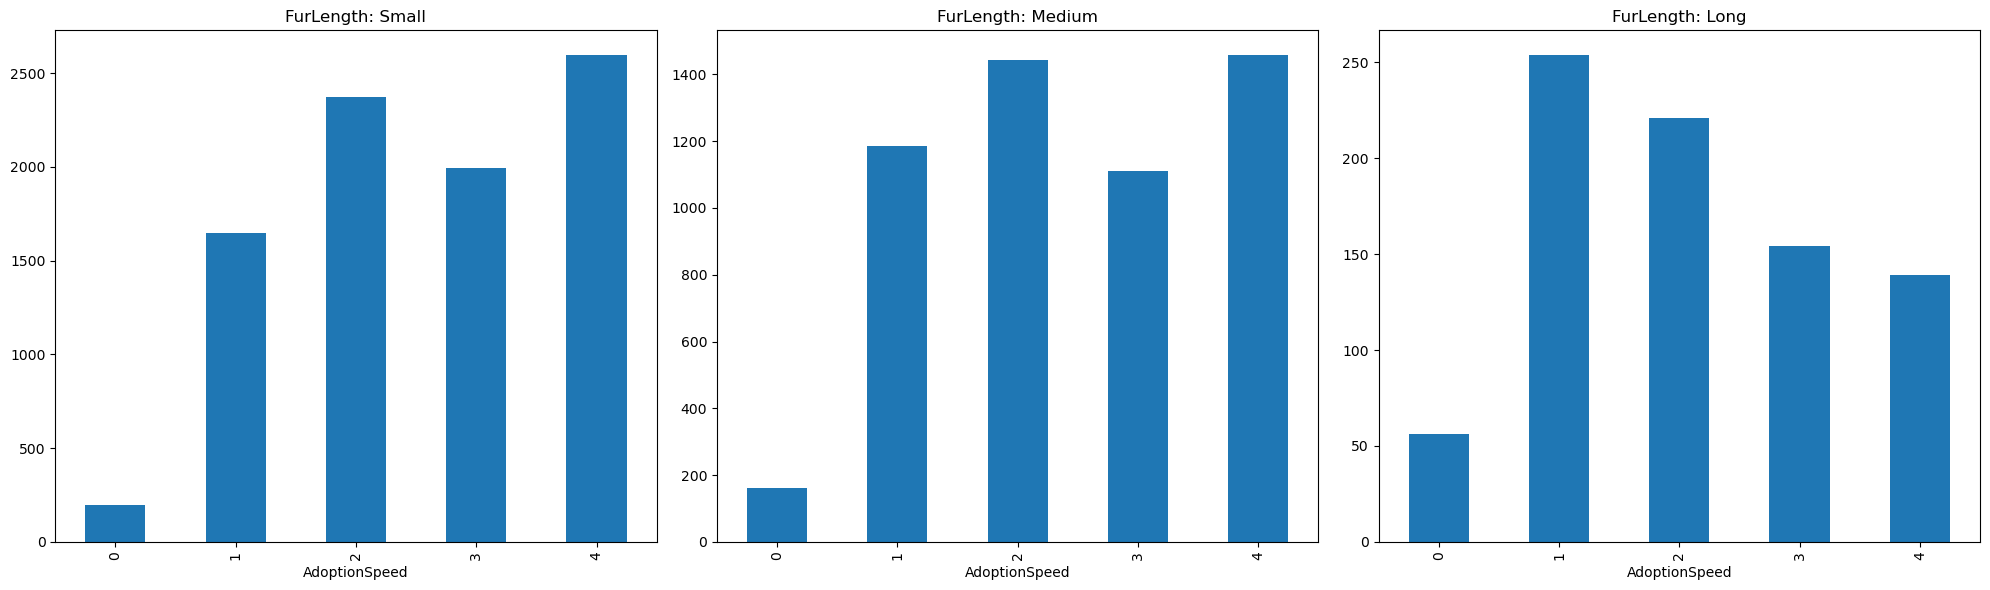

In [119]:
# visualise it like this because I wan the y-axis scale to be different due to the huge difference in scale
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

for idx, (index, value) in enumerate(df_EDA['FurLengthName'].value_counts().items()):
    ax = axes[idx]  # Get the current axis from the axes array
    temp = df_EDA[df_EDA['FurLengthName'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"FurLength: {index}")

plt.tight_layout()
plt.show()

In [120]:
df_EDA.groupby('FurLengthName')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
FurLengthName,,,,,,,,
Long,824.0,2.080097,1.198781,0.0,1.0,2.0,3.0,4.0
Medium,5361.0,2.470435,1.189786,0.0,1.0,2.0,4.0,4.0
Small,8808.0,2.585263,1.157416,0.0,2.0,3.0,4.0,4.0


We can see that animals under FurLength Long(3) get adopted at a faster rate with lower AdoptionSpeed, followed by Medium(2) and then last is Small(1)

## Does being Vaccinated affect adoption speed/rate?

In [104]:
df_EDA['VaccinatedName'].value_counts()

VaccinatedName
No          7227
Yes         5898
Not Sure    1868
Name: count, dtype: int64

We can see that most animals are not vaccinated (2), followed by vaccinated (1) followed by not sure (3)

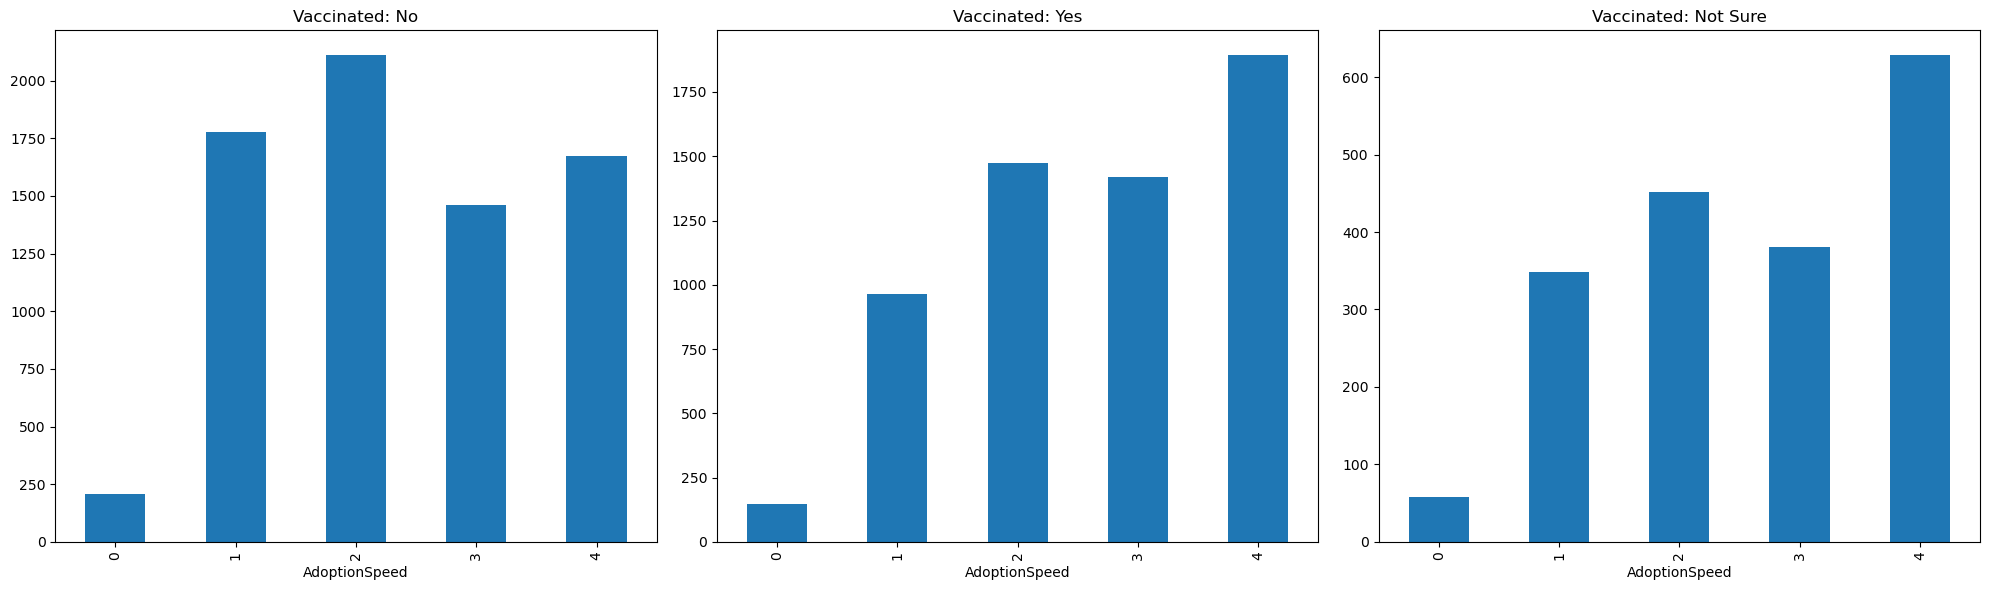

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

for idx, (index, value) in enumerate(df_EDA['VaccinatedName'].value_counts().items()):
    ax = axes[idx]  # Get the current axis from the axes array
    temp = df_EDA[df_EDA['VaccinatedName'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Vaccinated: {index}")

plt.tight_layout()
plt.show()

In [106]:
df_EDA.groupby('VaccinatedName')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
VaccinatedName,,,,,,,,
No,7227.0,2.361976,1.164867,0.0,1.0,2.0,3.0,4.0
Not Sure,1868.0,2.629015,1.210981,0.0,2.0,3.0,4.0,4.0
Yes,5898.0,2.670058,1.157434,0.0,2.0,3.0,4.0,4.0


From the visualisation and stats, we can see that for some reason, animals not being vaccinated(2) get adopted the fastest and being vaccinated (1) and Not sure(3) having roughly almost the same AdoptionSpeed with not sure being slightly faster which is surprising 

## Does being Dewormed affect adoption speed/rate?

In [107]:
df_EDA['DewormedName'].value_counts()

DewormedName
Yes         8397
No          4815
Not Sure    1781
Name: count, dtype: int64

We can see that most animals are dewormed(1) followed by not dewormed(2) and then last being not sure(3)

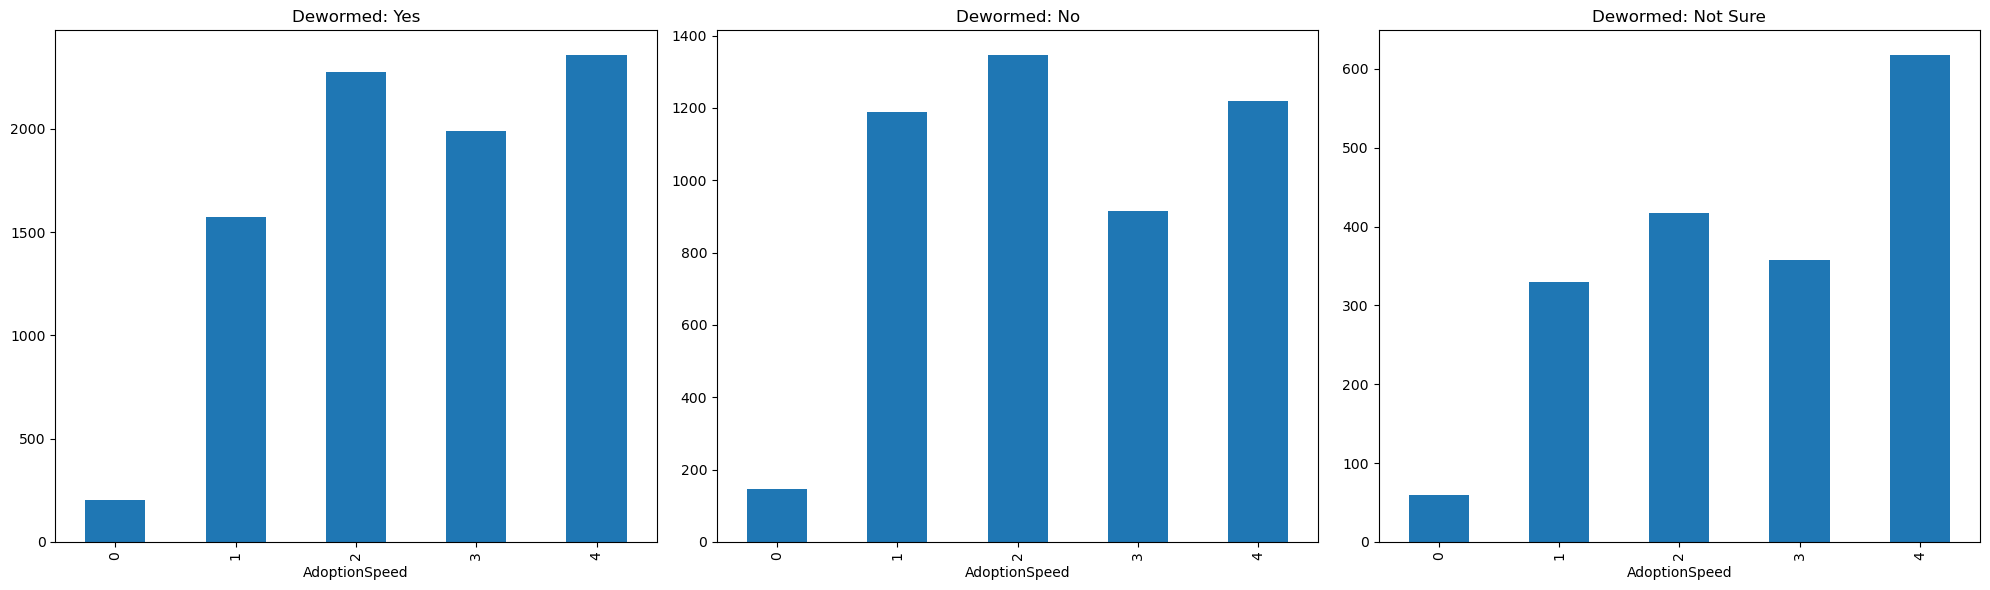

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

for idx, (index, value) in enumerate(df_EDA['DewormedName'].value_counts().items()):
    ax = axes[idx]  # Get the current axis from the axes array
    temp = df_EDA[df_EDA['DewormedName'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Dewormed: {index}")

plt.tight_layout()
plt.show()

In [29]:
df_EDA.groupby('Dewormed')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
Dewormed,,,,,,,,
1,8397.0,2.562582,1.152827,0.0,2.0,3.0,4.0,4.0
2,4815.0,2.389200,1.191704,0.0,1.0,2.0,4.0,4.0
3,1781.0,2.642897,1.222192,0.0,2.0,3.0,4.0,4.0


From the visualisation alone itself, we can actually see that not being dewormed tends to get adopted the fastest followed by being dewormed and then not sure. The statistics also proves it, this is very surprising as I thought being dewormed(1) would mean animal would likely to be more healthy and get adopted faster but look like its not the case similar to being Vaccinated

## Does being Sterilized affect adoption speed/rate?

In [109]:
df_EDA['SterilizedName'].value_counts()

SterilizedName
No          10077
Yes          3101
Not Sure     1815
Name: count, dtype: int64

We see that most animals are not sterilized(2) followed by sterilized(1) then not sure(3) as the least

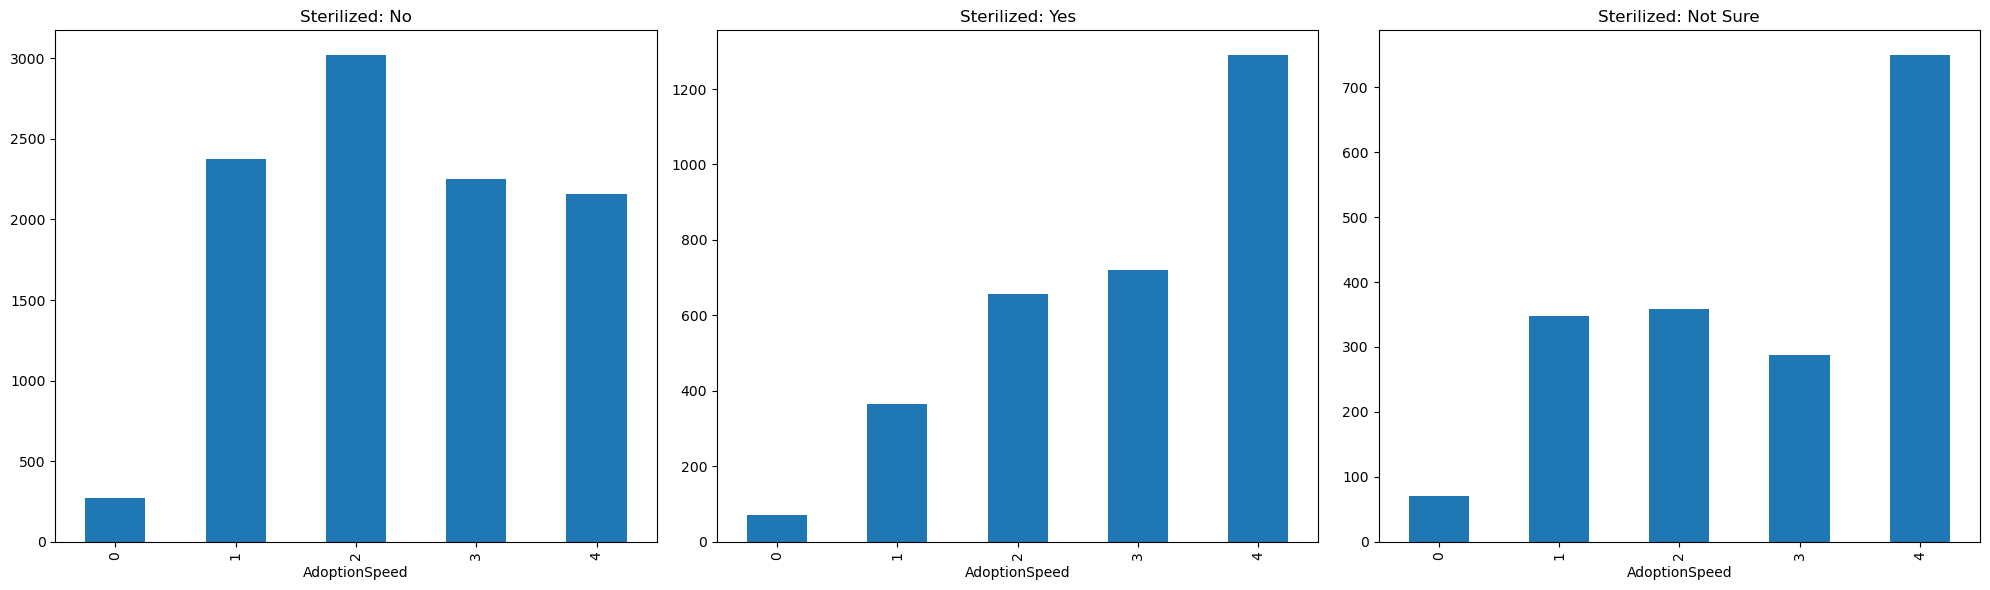

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

for idx, (index, value) in enumerate(df_EDA['SterilizedName'].value_counts().items()):
    ax = axes[idx]  # Get the current axis from the axes array
    temp = df_EDA[df_EDA['SterilizedName'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Sterilized: {index}")

plt.tight_layout()
plt.show()

In [112]:
df_EDA.groupby('SterilizedName')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
SterilizedName,,,,,,,,
No,10077.0,2.361715,1.136503,0.0,1.0,2.0,3.0,4.0
Not Sure,1815.0,2.716253,1.282756,0.0,2.0,3.0,4.0,4.0
Yes,3101.0,2.902290,1.136405,0.0,2.0,3.0,4.0,4.0


From the visualisation, we can see that animals not being Dewormed(2) tends to get adopted at a faster rate, with lower AdoptionSpeed followed by not sure (3) then last being dewormed(1). The statistics also support this based on the mean. Once again, this is very surprising similar to Dewormed and Vaccinated where people would adopt animals not receiveing anything at a faster rate

## Does Health affect adoption speed/rate?

In [115]:
df_EDA['HealthName'].value_counts()

HealthName
Healthy           14478
Minor Injury        481
Serious Injury       34
Name: count, dtype: int64

We can see that most animals are actually healthy (1) followed by Minor injury(2) then Serious Injury(3) with not specified (0) being none

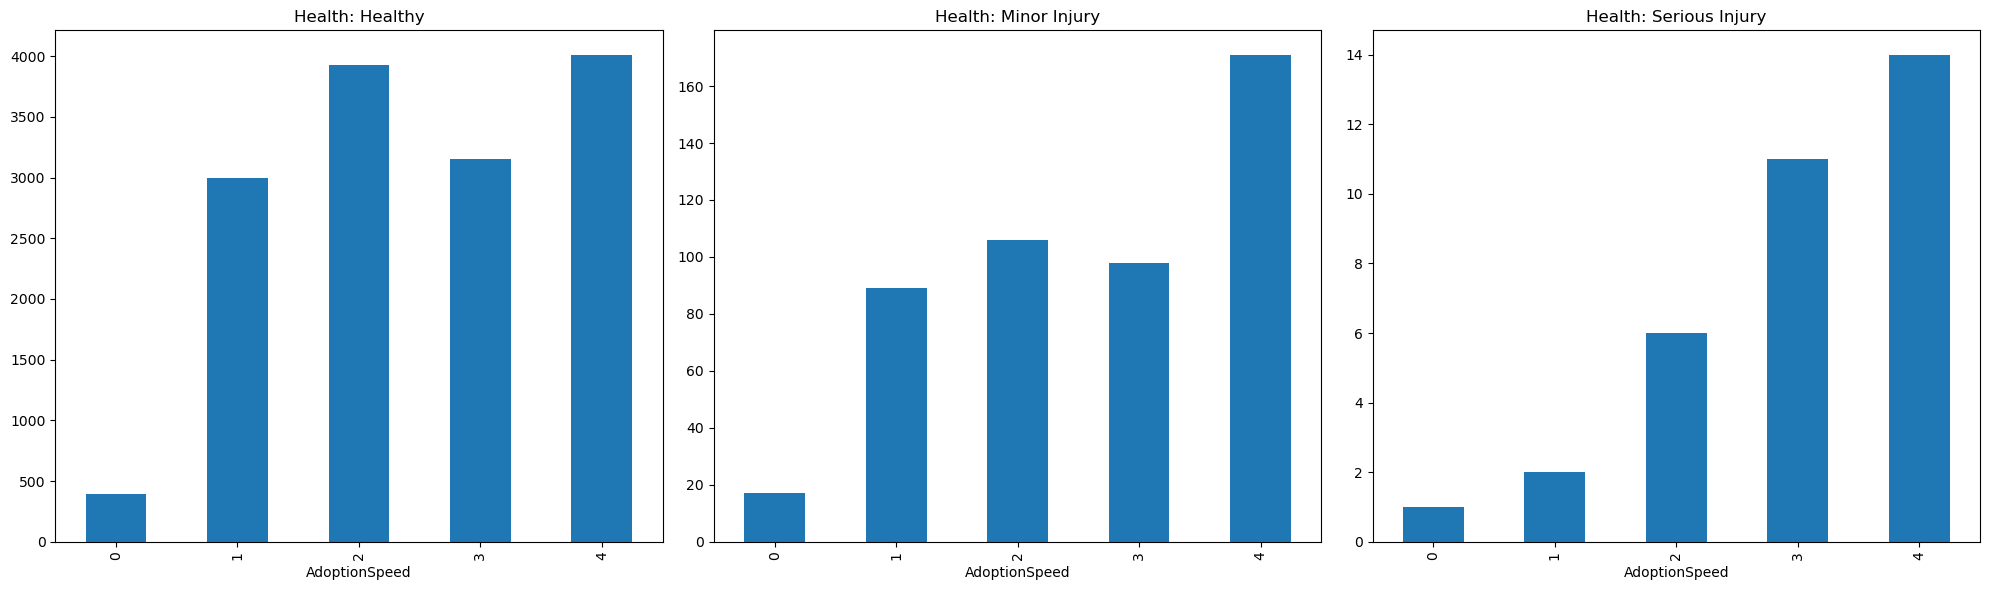

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

for idx, (index, value) in enumerate(df_EDA['HealthName'].value_counts().items()):
    ax = axes[idx]  # Get the current axis from the axes array
    temp = df_EDA[df_EDA['HealthName'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Health: {index}")

plt.tight_layout()
plt.show()

In [117]:
df_EDA.groupby('HealthName')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
HealthName,,,,,,,,
Healthy,14478.0,2.510499,1.175135,0.0,2.00,2.0,4.0,4.0
Minor Injury,481.0,2.659044,1.233291,0.0,2.00,3.0,4.0,4.0
Serious Injury,34.0,3.029412,1.058452,0.0,2.25,3.0,4.0,4.0


From the visualisation, we can already see that animals being Healthy(1) tends to get adopted at a faster rate, followed by Minor Injury(2) and then Serious Injury(3). The statistics also support this as shown by the mean. This makes much more sense whereby people would want to usually adopt a healthy animal faster as compared to non-healthy ones unfortunately

## Does Quantity affect adoption speed/rate?

In [45]:
df_EDA['Quantity'].value_counts()

Quantity
1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
14        2
13        2
18        1
Name: count, dtype: int64

We can see that in the actual listing, it does seems like there are situations when more than 1 animals are up for adoption together, I am going to choose the top 6 quantity as the other counts are extremely small to do a visualisation on

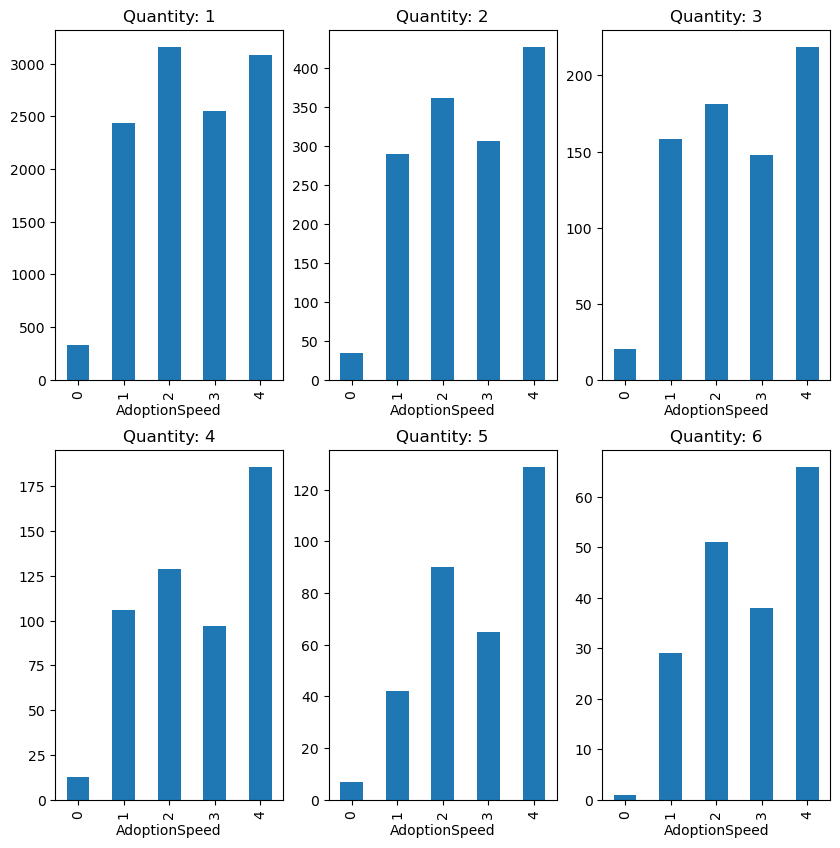

<Figure size 640x480 with 0 Axes>

In [61]:
fig,axes = plt.subplots(2,3,figsize=(10,10))
fig = plt.figure()
enum = 0
for index,value in df_EDA['Quantity'].value_counts()[:6].items():
    row,col=enum//3,enum%3
    ax = axes[row, col]
    temp = df_EDA[df_EDA['Quantity'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"Quantity: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

From the visualisation, we can sort of see that the lower the Quantity, the more even are the spread across the counts in each AdoptionSpeed category, indicating lesser Quantity get adopted at a faster rate, lets see the statistics for further information

In [83]:
df_EDA.groupby('Quantity')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
Quantity,,,,,,,,
1,11565.0,2.485171,1.173054,0.0,2.00,2.0,4.00,4.0
2,1422.0,2.564698,1.185043,0.0,2.00,3.0,4.00,4.0
3,726.0,2.534435,1.206099,0.0,2.00,3.0,4.00,4.0
4,531.0,2.634652,1.217113,0.0,2.00,3.0,4.00,4.0
5,333.0,2.801802,1.147180,0.0,2.00,3.0,4.00,4.0
6,185.0,2.751351,1.119399,0.0,2.00,3.0,4.00,4.0
7,84.0,2.833333,1.062315,1.0,2.00,3.0,4.00,4.0
8,52.0,2.634615,1.172041,0.0,2.00,3.0,4.00,4.0
9,33.0,2.757576,1.000947,1.0,2.00,3.0,4.00,4.0


It does look like there is a trend whereby the greater the number of quantity, the adoption speed of the animals also tend to get slower and have a higher AdoptionSpeed category. However, there might be issues where some of the quantity are represented by a very small number and this can disrupt the mean making it unfair, lets try using QuantityBins to represent the data better

## Using QuantityBins to see if it is a better than the actual Quantity

In [80]:
df_EDA['QuantityBins'].value_counts()

QuantityBins
1      11565
2       1422
3        726
4        531
>=6      416
5        333
Name: count, dtype: int64

This looks much better and neater

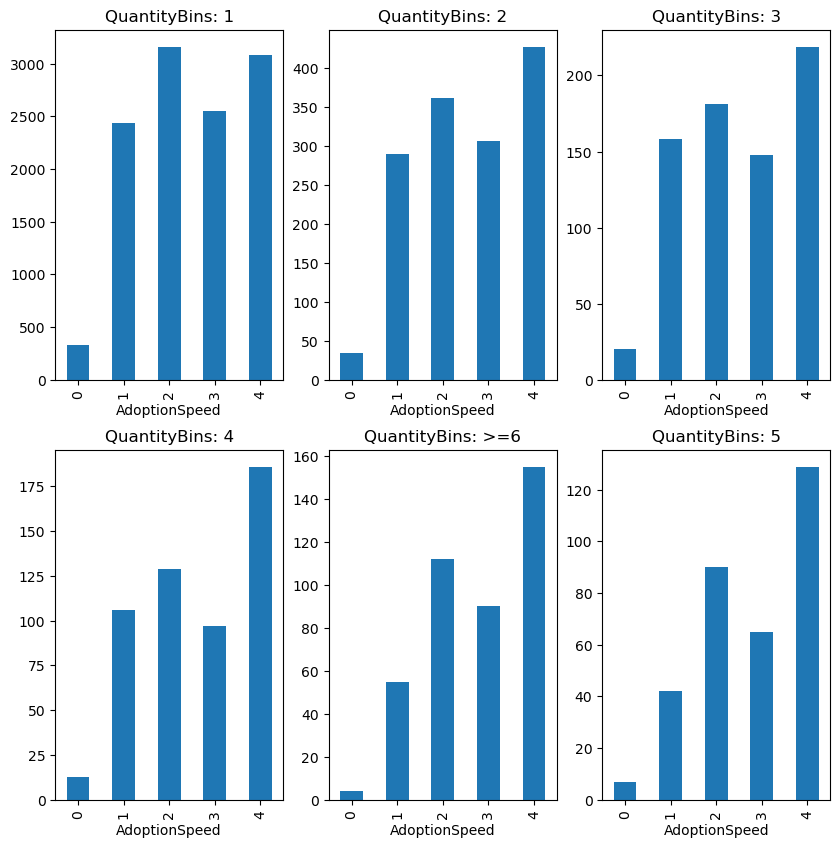

<Figure size 640x480 with 0 Axes>

In [88]:
fig,axes = plt.subplots(2,3,figsize=(10,10))
fig = plt.figure()
enum = 0
for index,value in df_EDA['QuantityBins'].value_counts()[:6].items():
    row,col=enum//3,enum%3
    ax = axes[row, col]
    temp = df_EDA[df_EDA['QuantityBins'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"QuantityBins: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

In [82]:
df_EDA.groupby('QuantityBins')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
QuantityBins,,,,,,,,
1,11565.0,2.485171,1.173054,0.0,2.0,2.0,4.0,4.0
2,1422.0,2.564698,1.185043,0.0,2.0,3.0,4.0,4.0
3,726.0,2.534435,1.206099,0.0,2.0,3.0,4.0,4.0
4,531.0,2.634652,1.217113,0.0,2.0,3.0,4.0,4.0
5,333.0,2.801802,1.147180,0.0,2.0,3.0,4.0,4.0
>=6,416.0,2.810096,1.106386,0.0,2.0,3.0,4.0,4.0


Looking at the visualisation alone, we can already see that  the lower the quantity, the more spread the count in each AdoptionSpeed categories are which indicates that the animals with lower quantity tends to get adopted faster, this is also supported by the statistics and now in each QuantityBins, at least there are more counts to take into account. This does makes sense as people might not want to adopt so many animals at one go immediately

## Does Fee affect adoption speed/rate?

In [66]:
df_EDA['Fee'].value_counts()

Fee
0      12663
50       468
100      408
200      219
150      162
       ...  
170        1
135        1
14         1
89         1
190        1
Name: count, Length: 74, dtype: int64

In [89]:
df_EDA.groupby('Fee')['AdoptionSpeed'].describe().sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Fee,,,,,,,,
0,12663.0,2.506673,1.174990,0.0,2.0,2.0,4.0,4.0
50,468.0,2.508547,1.186077,0.0,1.0,2.0,4.0,4.0
100,408.0,2.752451,1.201961,0.0,2.0,3.0,4.0,4.0
200,219.0,2.589041,1.159353,0.0,2.0,3.0,4.0,4.0
150,162.0,2.518519,1.276750,0.0,1.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...
320,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
125,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
135,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0


We can see that most of the animals are free of charge to get adopted which is great, and it is very difficult to see if Fee actually plays apart in affecting because from the table above, the relationship of adoptionSpeed and Fee is very difficult to see, furthermore there are simply too much fee to take into account, a total of 74, and some of them are under represented. Lets instead try FeeBins

## lets look at the FeeBins which might be a better feature to use and substitute it for this feature

In [73]:
df_EDA['FeeBins'].value_counts()

FeeBins
0              12663
[   1, 100)     1062
[ 200,3000]      642
[ 100, 200)      626
Name: count, dtype: int64

This looks much better as at least some of the value are not represented by just count of 1

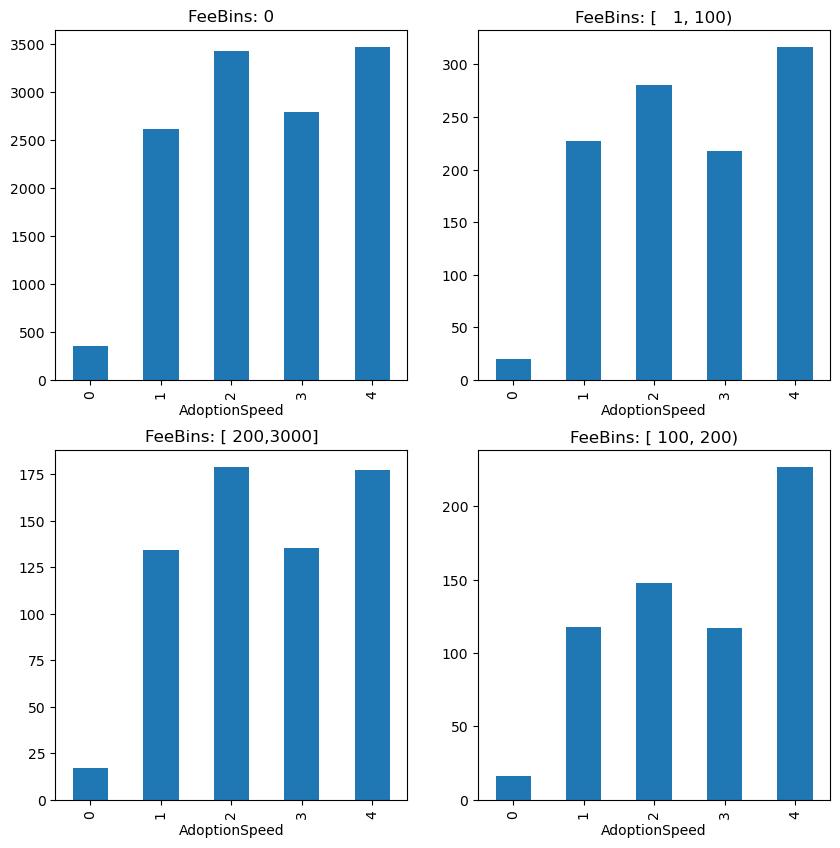

<Figure size 640x480 with 0 Axes>

In [79]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
fig = plt.figure()
enum = 0
for index,value in df_EDA['FeeBins'].value_counts().items():
    row,col=enum//2,enum%2
    ax = axes[row, col]
    temp = df_EDA[df_EDA['FeeBins'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"FeeBins: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

In [90]:
df_EDA.groupby('FeeBins')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
FeeBins,,,,,,,,
0,12663.0,2.506673,1.174990,0.0,2.0,2.0,4.0,4.0
"[ 1, 100)",1062.0,2.550847,1.177368,0.0,2.0,3.0,4.0,4.0
"[ 100, 200)",626.0,2.672524,1.215807,0.0,2.0,3.0,4.0,4.0
"[ 200,3000]",642.0,2.500000,1.174681,0.0,2.0,2.0,4.0,4.0


We can see that FeeBins [200,3000] have the lowest mean adoptionSpeed with FeeBins 0 being extremely close to it, followed by [1,100) then [100,200) which is extremely interesting as who would have thought that animals having the highest Fee to get adopted will get adopted faster as compared to animals that are cheaper to adopt. Later I will try either one of Fee or FeeBins and evaluate which is better to use

## Does State affect adoption speed/rate?

In [7]:
df_EDA['StateName'].value_counts()

StateName
Selangor           8714
Kuala Lumpur       3845
Pulau Pinang        843
Johor               507
Perak               420
Negeri Sembilan     253
Melaka              137
Kedah               110
Pahang               85
Terengganu           26
Sabah                22
Kelantan             15
Sarawak              13
Labuan                3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='StateName'>

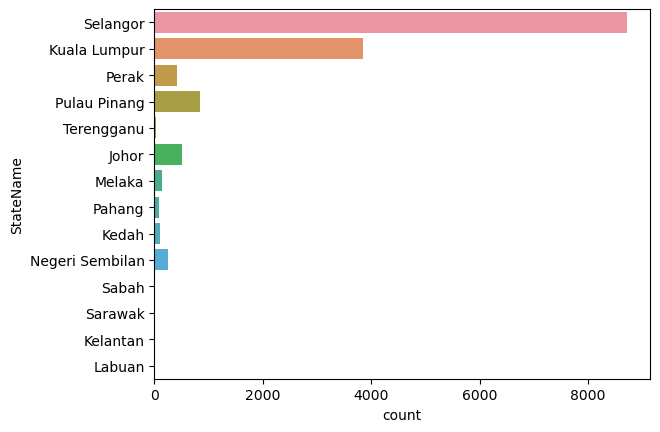

In [9]:
sns.countplot(data=df_EDA,y='StateName')

Selangor has the highest adoption count followed by Kuala Lumpur and Labuan has the least adoption count of only 3

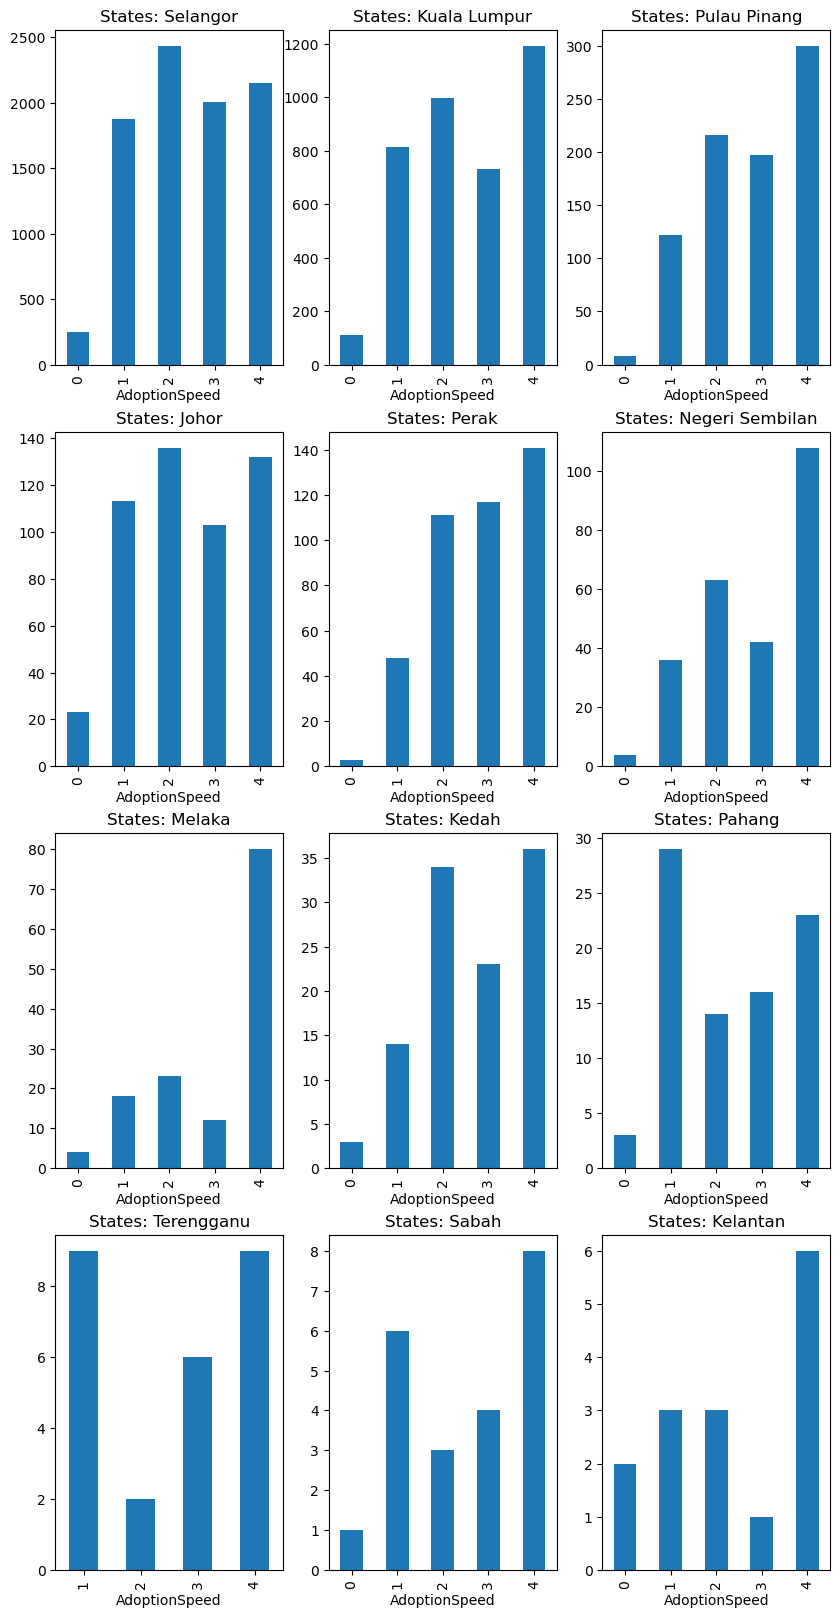

<Figure size 640x480 with 0 Axes>

In [26]:
fig,axes = plt.subplots(4,3,figsize=(10,20))
fig = plt.figure()
enum = 0
for index,value in df_EDA['StateName'].value_counts()[:12].items():
    row,col=enum//3,enum%3
    ax = axes[row, col]
    temp = df_EDA[df_EDA['StateName'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"States: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

In [22]:
df_EDA.groupby('StateName')['AdoptionSpeed'].describe().sort_values(by='mean',ascending=True)

,count,mean,std,min,25%,50%,75%,max
StateName,,,,,,,,
Pahang,85.0,2.317647,1.292946,0.0,1.0,2.0,4.0,4.0
Kelantan,15.0,2.400000,1.549193,0.0,1.0,2.0,4.0,4.0
Johor,507.0,2.410256,1.218003,0.0,1.0,2.0,4.0,4.0
Selangor,8714.0,2.452031,1.158428,0.0,2.0,2.0,3.0,4.0
Kuala Lumpur,3845.0,2.540182,1.211186,0.0,2.0,3.0,4.0,4.0
Sabah,22.0,2.545455,1.370689,0.0,1.0,3.0,4.0,4.0
Terengganu,26.0,2.576923,1.301478,1.0,1.0,3.0,4.0,4.0
Kedah,110.0,2.681818,1.140834,0.0,2.0,3.0,4.0,4.0
Pulau Pinang,843.0,2.781732,1.109149,0.0,2.0,3.0,4.0,4.0


From the visualisation, we can see that the spread across the AdoptionSpeed categories are different across states, indicating that there might a relationship. Using the statistics for a better view, we can see that States affect AdoptionSpeed where Pahang has the fastest adoption speed and Sarawak has the slowest adoption speed

In [24]:
df_EDA.groupby('StateBinsName')['AdoptionSpeed'].describe().sort_values(by='mean',ascending=True)

,count,mean,std,min,25%,50%,75%,max
StateBinsName,,,,,,,,
Johor,507.0,2.410256,1.218003,0.0,1.0,2.0,4.0,4.0
Selangor,8714.0,2.452031,1.158428,0.0,2.0,2.0,3.0,4.0
Kuala Lumpur,3845.0,2.540182,1.211186,0.0,2.0,3.0,4.0,4.0
Others,411.0,2.732360,1.276962,0.0,2.0,3.0,4.0,4.0
Pulau Pinang,843.0,2.781732,1.109149,0.0,2.0,3.0,4.0,4.0
Perak,420.0,2.821429,1.045056,0.0,2.0,3.0,4.0,4.0
Negeri Sembilan,253.0,2.845850,1.170043,0.0,2.0,3.0,4.0,4.0


I feel some areas become too generalized like Melaka and Pahang, so I would use the states instead of StateBins

## Does VideoAmt affect adoption speed/rate?    

In [27]:
df_EDA['VideoAmt'].value_counts()

VideoAmt
0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='VideoAmt'>

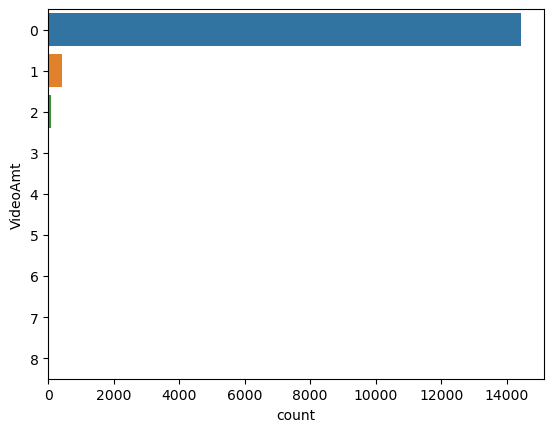

In [29]:
sns.countplot(data=df_EDA,y='VideoAmt')

Seems like most animals have 0 videos followed by 1 then 2, the count of other VideoAmt are extremely small. Lets just see the statistics

In [30]:
df_EDA.groupby('VideoAmt')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
VideoAmt,,,,,,,,
0,14419.0,2.519176,1.179877,0.0,2.00,2.0,4.00,4.0
1,417.0,2.422062,1.119878,0.0,2.00,2.0,3.00,4.0
2,92.0,2.369565,1.055778,0.0,2.00,2.0,3.00,4.0
3,36.0,2.555556,1.132493,0.0,2.00,2.0,4.00,4.0
4,15.0,3.066667,0.961150,1.0,2.50,3.0,4.00,4.0
5,7.0,2.571429,0.975900,1.0,2.00,3.0,3.00,4.0
6,4.0,3.000000,1.414214,1.0,2.50,3.5,4.00,4.0
7,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
8,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0


Looking at the count of each VideoAmt, from 2 onwards, the count seems very little as compared to the others, perhaps binning them would be better and lets see VideoAmtBins instead

In [31]:
df_EDA.groupby('VideoAmtBins')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
VideoAmtBins,,,,,,,,
0,14419.0,2.519176,1.179877,0.0,2.0,2.0,4.0,4.0
1,417.0,2.422062,1.119878,0.0,2.0,2.0,3.0,4.0
>=2,157.0,2.515924,1.077777,0.0,2.0,3.0,3.0,4.0


We can see that videoAmtBins 1 has the fastest adoption speed followed by >=2 then 0 with these 2 not being far apart, It is quite difficult to decide which variable to use, so I will just use VideoAmtBins to reduce dimensionality of features

## Does PhotoAmt affect adoption speed/rate?

In [33]:
df_EDA['PhotoAmt'].value_counts()

PhotoAmt
1     3075
2     2518
3     2511
5     2147
4     1881
6      621
7      432
0      341
8      314
9      231
10     190
11     184
12      97
13      86
14      78
15      50
16      39
17      27
20      25
19      20
30      19
18      18
21      16
24      15
23      12
26      10
22       9
25       8
28       7
27       6
29       6
Name: count, dtype: int64

<Axes: xlabel='PhotoAmt', ylabel='count'>

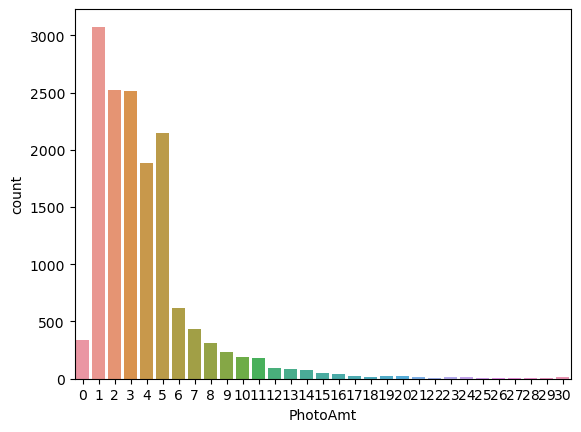

In [43]:
sns.countplot(data=df_EDA,x='PhotoAmt')

Seems like there is quite a spread in the photo amount in the data, with 1 being the most followed by 2 and the overall trend is the greater the photo amount, the lesser number of it

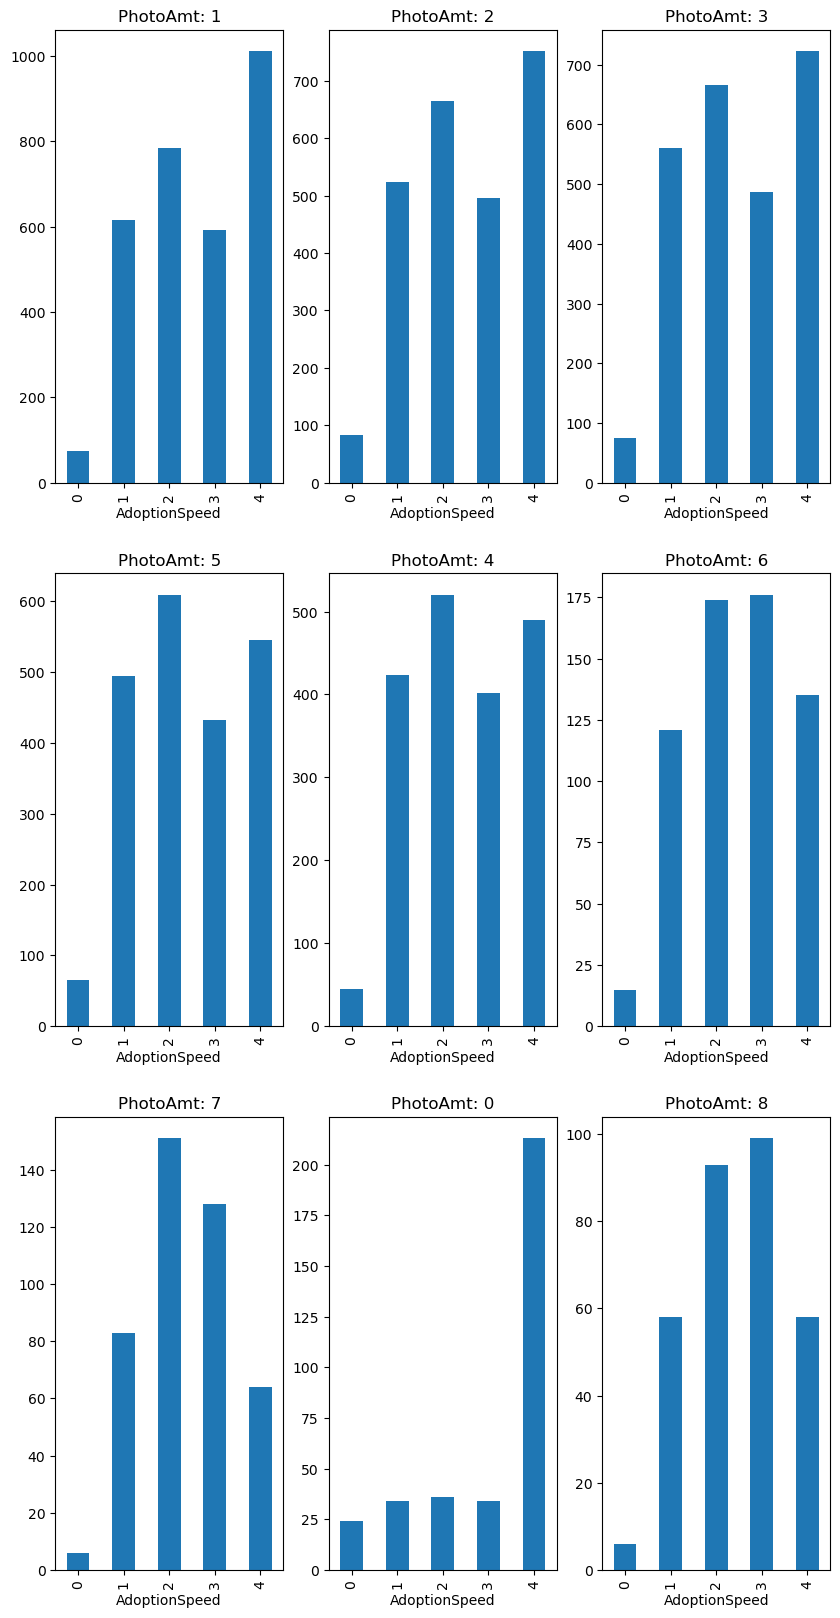

<Figure size 640x480 with 0 Axes>

In [34]:
fig,axes = plt.subplots(3,3,figsize=(10,20))
fig = plt.figure()
enum = 0
for index,value in df_EDA['PhotoAmt'].value_counts()[:9].items():
    row,col=enum//3,enum%3
    ax = axes[row, col]
    temp = df_EDA[df_EDA['PhotoAmt'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"PhotoAmt: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

It does seems like the spread are different across the photoAmts, lets see the statistics

In [35]:
df_EDA.groupby('PhotoAmt')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
PhotoAmt,,,,,,,,
0,341.0,3.108504,1.325081,0.0,2.00,4.0,4.00,4.0
1,3075.0,2.600650,1.201495,0.0,2.00,3.0,4.00,4.0
2,2518.0,2.519857,1.208253,0.0,2.00,2.0,4.00,4.0
3,2511.0,2.485862,1.204779,0.0,1.00,2.0,4.00,4.0
4,1881.0,2.461457,1.168163,0.0,2.00,2.0,4.00,4.0
5,2147.0,2.418258,1.180851,0.0,1.00,2.0,4.00,4.0
6,621.0,2.475040,1.104874,0.0,2.00,3.0,3.00,4.0
7,432.0,2.372685,0.999997,0.0,2.00,2.0,3.00,4.0
8,314.0,2.461783,1.051458,0.0,2.00,2.5,3.00,4.0


It does seems like in general, the greater the amount of picture, the faster the animals get adopted, this trend is specifically from 0 - 5 but right after 5, it becomes quite random which might just mean we need to include this feature

In [36]:
df_EDA.groupby('AdoptionSpeed')['PhotoAmt'].describe()

,count,mean,std,min,25%,50%,75%,max
AdoptionSpeed,,,,,,,,
0,410.0,3.324390,2.830093,0.0,2.0,3.0,5.0,27.0
1,3090.0,3.727184,2.993303,0.0,2.0,3.0,5.0,30.0
2,4037.0,4.071836,3.472787,0.0,2.0,3.0,5.0,30.0
3,3259.0,4.620743,4.204387,0.0,2.0,4.0,5.5,30.0
4,4197.0,3.319990,3.152664,0.0,1.0,3.0,4.0,30.0


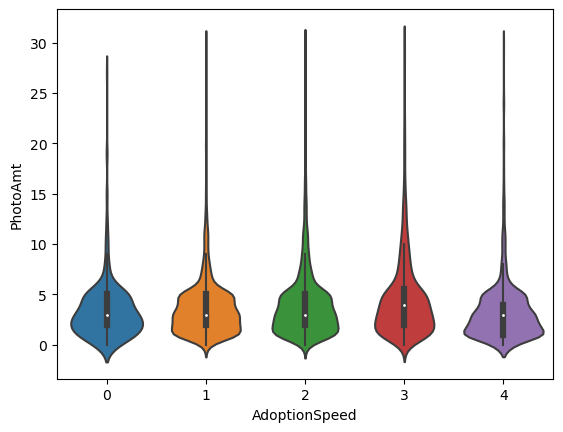

In [45]:
sns.violinplot(x="AdoptionSpeed", y="PhotoAmt", data=df_EDA);

The visualisation itself doesnt really help as it looks almost the same throughout

From statstics itself, from AdoptionSpeed 0 to 3, the mean amount of picture is increasing which makes sense as people can get more information about the animals through more pictures and so can decide better if they want to adopt at a faster rate but for AdoptionSpeed 4, all of a sudden the mean imageAmt is the lowest which is very odd, does that mean it might be the case where some animals can only be adopted after 100 days?

## Lets look at the PhotoAmtbins now 

In [38]:
df_EDA['PhotoAmtBins'].value_counts()

PhotoAmtBins
1      3075
>=6    2520
2      2518
3      2511
5      2147
4      1881
0       341
Name: count, dtype: int64

<Axes: xlabel='PhotoAmtBins', ylabel='count'>

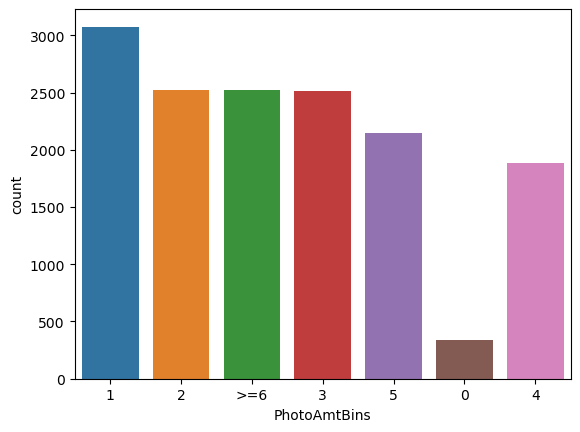

In [39]:
sns.countplot(df_EDA,x='PhotoAmtBins')

Looks like a nicer spread as compared to looking at photoAmt individually

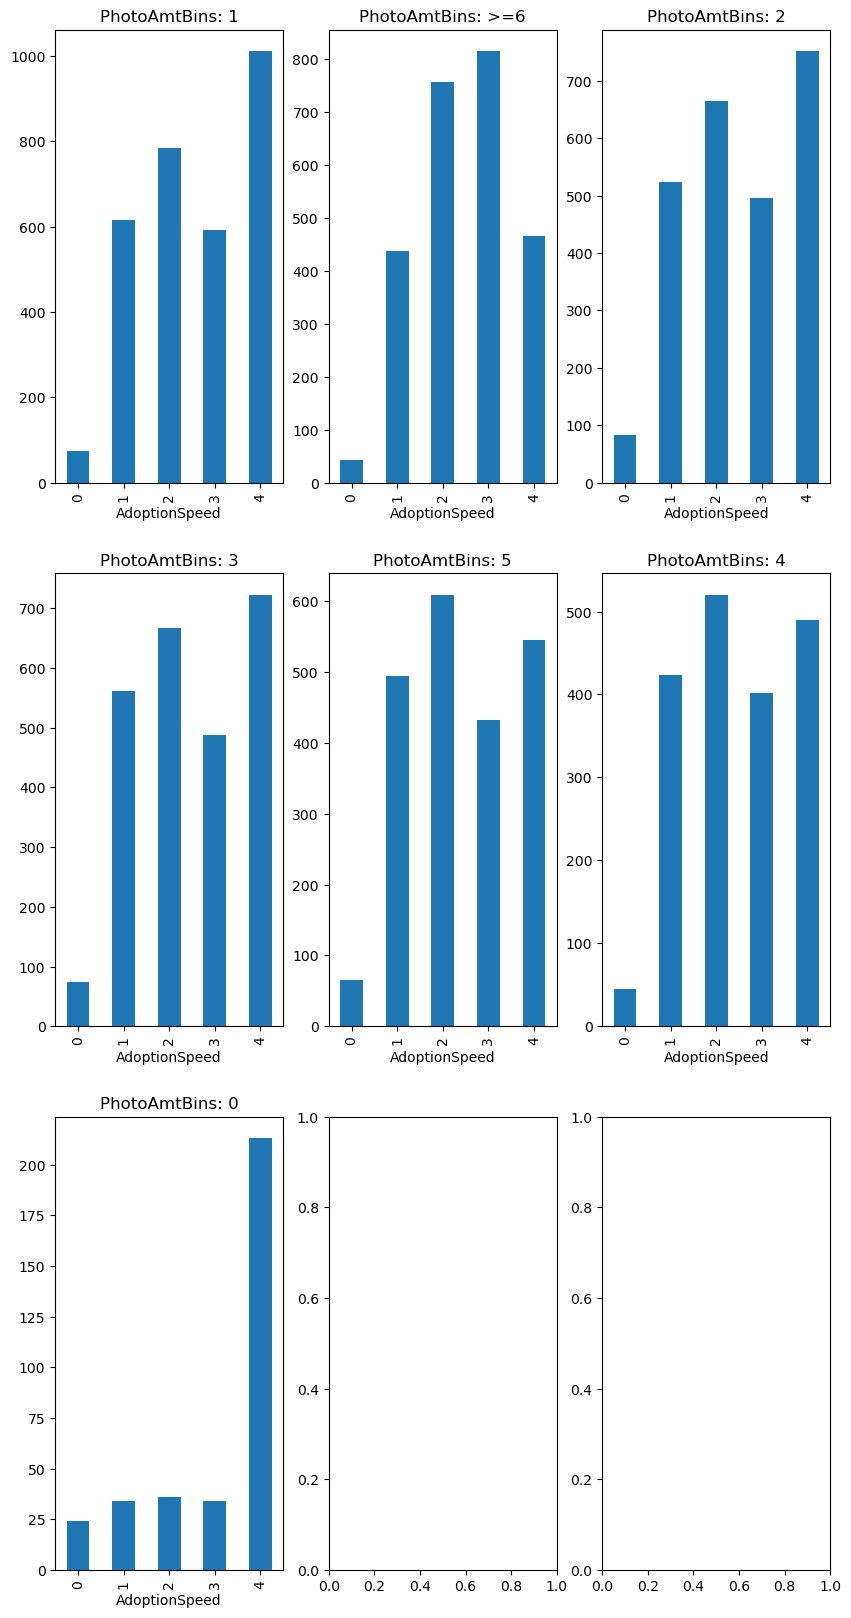

<Figure size 640x480 with 0 Axes>

In [40]:
fig,axes = plt.subplots(3,3,figsize=(10,20))
fig = plt.figure()
enum = 0
for index,value in df_EDA['PhotoAmtBins'].value_counts()[:9].items():
    row,col=enum//3,enum%3
    ax = axes[row, col]
    temp = df_EDA[df_EDA['PhotoAmtBins'] == index]
    temp['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f"PhotoAmtBins: {index}")
    enum+=1
    
plt.tight_layout()
plt.show()

In [47]:
df_EDA.groupby('PhotoAmtBins')['AdoptionSpeed'].describe()

,count,mean,std,min,25%,50%,75%,max
PhotoAmtBins,,,,,,,,
0,341.0,3.108504,1.325081,0.0,2.0,4.0,4.0,4.0
1,3075.0,2.600650,1.201495,0.0,2.0,3.0,4.0,4.0
2,2518.0,2.519857,1.208253,0.0,2.0,2.0,4.0,4.0
3,2511.0,2.485862,1.204779,0.0,1.0,2.0,4.0,4.0
4,1881.0,2.461457,1.168163,0.0,2.0,2.0,4.0,4.0
5,2147.0,2.418258,1.180851,0.0,1.0,2.0,4.0,4.0
>=6,2520.0,2.485317,1.034432,0.0,2.0,3.0,3.0,4.0


From the stats, it follows the same trend which from 0 to 5 PhotoAmtBins, the trend of mean for AdoptionSpeed is decreasing but at PhotoAmtBins >=6, it increases slightly. However, I feel like the actual PhotoAmt might be more useful as since the pattern from 6 onwards are random, that means each photo amount might have an effect to adoption speed even though personally I think its just due to chances but I will try it in the model and evaluate

## Exploring Description

### Lets check the no of words of the description first

In [110]:
df_EDA.Description.isna().sum()

13

In [37]:
df_EDA['Description'] = df_EDA['Description'].fillna("-")

In [38]:
# getting the no of words of the raw description
df_EDA['DescriptionWordCount'] = df_EDA['Description'].apply(lambda desc: len(desc.split()))
df_EDA['DescriptionWordCount']

0        69
1        23
2        69
3        25
4        81
         ..
14988    78
14989    31
14990     9
14991    18
14992    16
Name: DescriptionWordCount, Length: 14993, dtype: int64

In [40]:
df_EDA['DescriptionWordCount'].describe()

count    14993.000000
mean        62.918629
std         69.323013
min          1.000000
25%         21.000000
50%         44.000000
75%         81.000000
max       1257.000000
Name: DescriptionWordCount, dtype: float64

<Axes: ylabel='Frequency'>

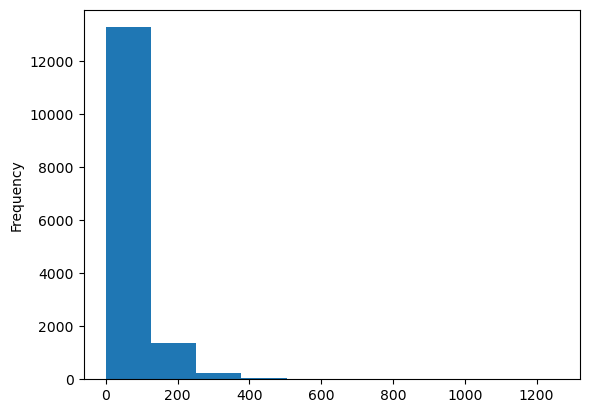

In [41]:
df_EDA['DescriptionWordCount'].plot(kind='hist') 

In [42]:
df_EDA.groupby('AdoptionSpeed')['DescriptionWordCount'].describe()

,count,mean,std,min,25%,50%,75%,max
AdoptionSpeed,,,,,,,,
0,410.0,57.009756,56.024924,1.0,18.0,42.0,77.75,392.0
1,3090.0,62.650485,64.763605,1.0,21.0,46.0,81.00,1153.0
2,4037.0,63.914788,69.597738,1.0,22.0,44.0,81.00,870.0
3,3259.0,67.688555,76.784386,1.0,22.0,46.0,84.00,1095.0
4,4197.0,59.031213,67.100143,1.0,18.0,40.0,77.00,1257.0


Seems like from AdoptionSpeed 0 to 3, the mean word count is increasing which means the lower the word count, the faster the adoption speed except for AdoptionSpeed 4 which is slightly different as it has the 2nd lowest mean word count

### Lets check the length of each description as well

In [43]:
df_EDA['DescriptionLength'] = df_EDA['Description'].apply(lambda desc: len(desc))
df_EDA['DescriptionLength']

0        359
1        118
2        393
3        146
4        390
        ... 
14988    396
14989    172
14990     64
14991    133
14992     90
Name: DescriptionLength, Length: 14993, dtype: int64

<Axes: ylabel='Frequency'>

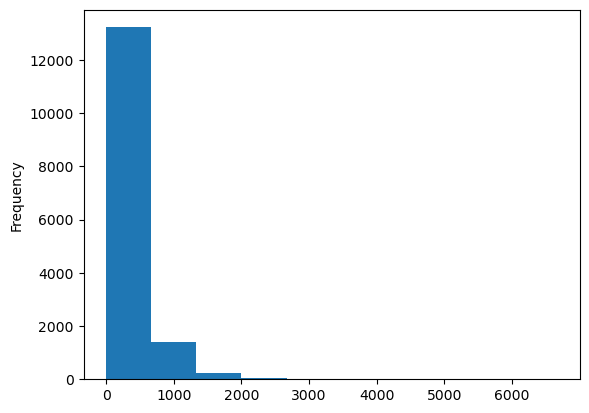

In [44]:
df_EDA['DescriptionLength'].plot(kind='hist') 

In [46]:
df_EDA['DescriptionLength'].describe()

count    14993.000000
mean       339.110251
std        373.506918
min          1.000000
25%        116.000000
50%        238.000000
75%        431.000000
max       6664.000000
Name: DescriptionLength, dtype: float64

In [47]:
df_EDA.groupby('AdoptionSpeed')['DescriptionLength'].describe()

,count,mean,std,min,25%,50%,75%,max
AdoptionSpeed,,,,,,,,
0,410.0,303.834146,298.961997,2.0,100.25,224.0,398.0,2150.0
1,3090.0,336.829126,344.699589,1.0,118.25,248.0,437.0,5798.0
2,4037.0,346.004459,377.580528,1.0,122.00,241.0,436.0,4545.0
3,3259.0,367.091132,414.584236,1.0,124.00,255.0,448.0,5955.0
4,4197.0,315.877055,361.053871,1.0,102.00,216.0,408.0,6664.0


From here it is similar to the word count as well whereby from AdoptionSpeed 0 to 4, the mean length is increasing which means the lesser the length of the description, the faster the adoption speed except for adoption speed 4 again

In [74]:
df_EDA['DescriptionCleaned'] = df_EDA['Description']

### Cleaning the description

In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

df_EDA['DescriptionCleaned'] = df_EDA['DescriptionCleaned'].str.lower()
df_EDA['DescriptionCleaned'] = df_EDA['DescriptionCleaned'].apply(cleanPunc)
df_EDA['DescriptionCleaned']= df_EDA['DescriptionCleaned'].apply(keepAlpha)

### Removing stopword

In [82]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve','thirteen','fourteen','fifteen','sixteen','seventeen','eighteen','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df_EDA['DescriptionCleaned'] = df_EDA['DescriptionCleaned'].apply(removeStopWords)
df_EDA.iloc[0].DescriptionCleaned

'nibble     month old ball  cuteness   energetic  playful  rescued  couple  cats   months ago  could  get  neutered  time   clinic  fully scheduled  result   little kitty     enough space  funds  care   cats   household looking  responsible people  take  nibbles care'

### Stemming

In [87]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df_EDA['DescriptionCleaned'] = df_EDA['DescriptionCleaned'].apply(stemming)
df_EDA.iloc[0].DescriptionCleaned

'nibbl month old ball cute energet play rescu coupl cat month ago could get neuter time clinic fulli schedul result littl kitti enough space fund care cat household look respons peopl take nibbl care'

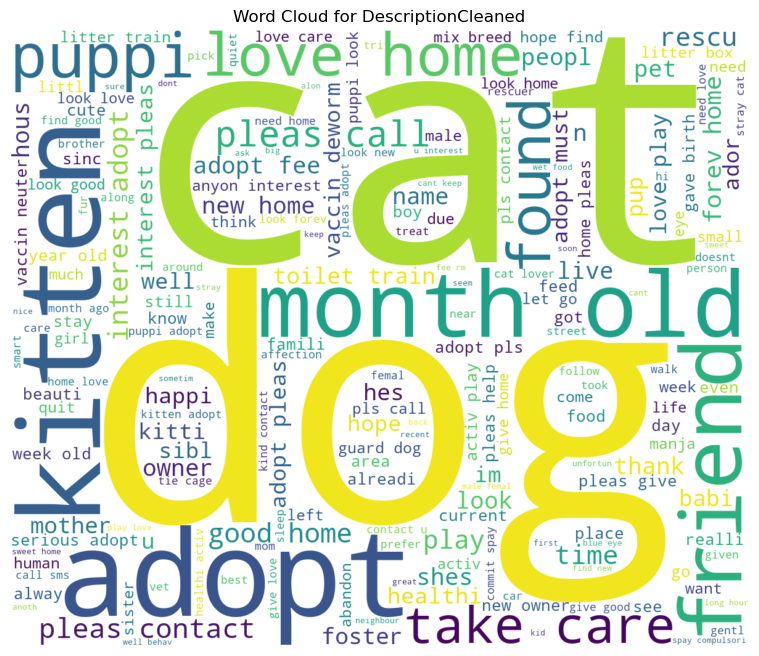

In [89]:
from wordcloud import WordCloud

# Concatenate all descriptions into a single string
text_cat = ' '.join(df_EDA['DescriptionCleaned'].fillna('').values)

# Generate the word cloud
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for DescriptionCleaned')
plt.axis("off")
plt.show()

From the word cloud seems like cat,dog,adopt are the few most common words. These are the different words that appear in the description after cleaning, removing stop word and stemming

In [45]:
df_EDA.to_csv('testing.csv',index=False)

# preparing pets_prepared data and choosing the features that we want to include to train the model

In [214]:
df_EDA = pd.read_csv('testing.csv')

In [215]:
pets_prepared['DescriptionLength'] = df_EDA['DescriptionLength']
pets_prepared['DescriptionWordCount'] = df_EDA['DescriptionWordCount']
pets_prepared['DescriptionCleaned'] = df_EDA['DescriptionCleaned']

In [216]:
pets_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PetID                 14993 non-null  object
 1   AdoptionSpeed         14993 non-null  int64 
 2   Type                  14993 non-null  int64 
 3   Name                  14985 non-null  object
 4   Age                   14993 non-null  int64 
 5   Breed1                14993 non-null  int64 
 6   Breed2                14993 non-null  int64 
 7   Gender                14993 non-null  int64 
 8   Color1                14993 non-null  int64 
 9   Color2                14993 non-null  int64 
 10  Color3                14993 non-null  int64 
 11  MaturitySize          14993 non-null  int64 
 12  FurLength             14993 non-null  int64 
 13  Vaccinated            14993 non-null  int64 
 14  Dewormed              14993 non-null  int64 
 15  Sterilized            14993 non-null

In [154]:
df = pets_prepared.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,31,32,33,49,50]].copy()

I have decided to use Fee instead of FeeBins and VideoAmt instead of VideoAmtBins as it return a higher accuracy, lets also test out if Color2 and Color3 is useful as well

### Trying with Color2 and Color3

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AdoptionSpeed         14993 non-null  int64 
 1   Type                  14993 non-null  int64 
 2   Age                   14993 non-null  int64 
 3   Breed1                14993 non-null  int64 
 4   Breed2                14993 non-null  int64 
 5   Gender                14993 non-null  int64 
 6   Color1                14993 non-null  int64 
 7   Color2                14993 non-null  int64 
 8   Color3                14993 non-null  int64 
 9   MaturitySize          14993 non-null  int64 
 10  FurLength             14993 non-null  int64 
 11  Vaccinated            14993 non-null  int64 
 12  Dewormed              14993 non-null  int64 
 13  Sterilized            14993 non-null  int64 
 14  Health                14993 non-null  int64 
 15  Quantity              14993 non-null

## Converting some of the type object columns into int through label encoding to standardise everything

In [95]:
from sklearn import preprocessing

for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AdoptionSpeed         14993 non-null  int64
 1   Type                  14993 non-null  int64
 2   Age                   14993 non-null  int64
 3   Breed1                14993 non-null  int64
 4   Breed2                14993 non-null  int64
 5   Gender                14993 non-null  int64
 6   Color1                14993 non-null  int64
 7   Color2                14993 non-null  int64
 8   Color3                14993 non-null  int64
 9   MaturitySize          14993 non-null  int64
 10  FurLength             14993 non-null  int64
 11  Vaccinated            14993 non-null  int64
 12  Dewormed              14993 non-null  int64
 13  Sterilized            14993 non-null  int64
 14  Health                14993 non-null  int64
 15  Fee                   14993 non-null  int64
 16  Stat

### Splitting the data into training and testing set

In [97]:
from sklearn.model_selection import train_test_split
X = df.drop('AdoptionSpeed',axis=1)
y = df['AdoptionSpeed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## After evaluating all the different baseline model, I have found random forest to be the best (Evaluation at most below), so now I will train the random forest classifier model with Color2 and Color3 included

# Baseline model comparison to see which I should choose to train with

### RandomForestClassifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc_test = RandomForestClassifier()
rfc_test.fit(X_train,y_train)
y_pred_test= rfc_test.predict(X_test)

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred_test, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.67      0.08      0.14        75
           1       0.37      0.31      0.34       634
           2       0.39      0.41      0.40       828
           3       0.40      0.28      0.33       649
           4       0.49      0.66      0.56       813

    accuracy                           0.42      2999
   macro avg       0.46      0.35      0.35      2999
weighted avg       0.42      0.42      0.41      2999



### GradientBoostingClassifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_pred_test= gbm.predict(X_test)

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred_test, target_names=class_labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.37      0.31      0.34       634
           2       0.35      0.44      0.39       828
           3       0.42      0.20      0.27       649
           4       0.48      0.66      0.55       813

    accuracy                           0.41      2999
   macro avg       0.32      0.32      0.31      2999
weighted avg       0.40      0.41      0.39      2999



### AdaBoostClassifier

In [100]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred_test= abc.predict(X_test)

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred_test, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.36      0.30      0.33       634
           2       0.36      0.41      0.38       828
           3       0.33      0.17      0.23       649
           4       0.45      0.65      0.53       813

    accuracy                           0.39      2999
   macro avg       0.30      0.31      0.29      2999
weighted avg       0.37      0.39      0.37      2999



### SVM

In [101]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred_test= svc.predict(X_test)

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred_test, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.00      0.00      0.00       634
           2       0.00      0.00      0.00       828
           3       0.00      0.00      0.00       649
           4       0.27      1.00      0.43       813

    accuracy                           0.27      2999
   macro avg       0.05      0.20      0.09      2999
weighted avg       0.07      0.27      0.12      2999



C:\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBClassifier

In [104]:
from xgboost import XGBClassifier

bst = XGBClassifier()
bst.fit(X_train, y_train)
y_pred_test= bst.predict(X_test)

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred_test, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.18      0.03      0.05        75
           1       0.36      0.31      0.33       634
           2       0.35      0.39      0.37       828
           3       0.37      0.26      0.30       649
           4       0.49      0.64      0.55       813

    accuracy                           0.40      2999
   macro avg       0.35      0.33      0.32      2999
weighted avg       0.39      0.40      0.39      2999



### GaussianNaiveBayes

In [106]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred_test= NB.predict(X_test)

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred_test, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.02      0.01      0.02        75
           1       0.29      0.41      0.34       634
           2       0.32      0.29      0.30       828
           3       0.32      0.18      0.23       649
           4       0.41      0.50      0.45       813

    accuracy                           0.34      2999
   macro avg       0.27      0.28      0.27      2999
weighted avg       0.33      0.34      0.33      2999



In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc_test = RandomForestClassifier(n_estimators=300)
rfc_test.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=300)

In [72]:
# Predict output using testing set
 
y_pred= rfc_test.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) .sample(10)

,Actual,Predicted
6054,4,4
4447,3,2
13370,1,1
6821,4,2
6271,2,1
8612,4,4
14245,4,2
10855,4,4
13535,2,4
7427,2,4


In [64]:
from sklearn.metrics import classification_report

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        75
           1       0.38      0.32      0.35       634
           2       0.40      0.43      0.42       828
           3       0.42      0.26      0.32       649
           4       0.48      0.69      0.57       813

    accuracy                           0.43      2999
   macro avg       0.54      0.35      0.35      2999
weighted avg       0.44      0.43      0.41      2999



### There are more models I can test but I will stop at here. Since random forest has the best baseline model result, I will use it as my main model

### Trying random forest classifier without Color2 and Color3 (Did it for videoAmtBins and VideoAmt, Fee and FeeBins as well but didnt show)

In [186]:
df = pets_prepared.iloc[:,[1,2,4,5,6,8,11,12,13,14,15,16,17,18,19,21,22,31,32,33,49,50]].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AdoptionSpeed         14993 non-null  int64 
 1   Type                  14993 non-null  int64 
 2   Age                   14993 non-null  int64 
 3   Breed1                14993 non-null  int64 
 4   Breed2                14993 non-null  int64 
 5   Color1                14993 non-null  int64 
 6   MaturitySize          14993 non-null  int64 
 7   FurLength             14993 non-null  int64 
 8   Vaccinated            14993 non-null  int64 
 9   Dewormed              14993 non-null  int64 
 10  Sterilized            14993 non-null  int64 
 11  Health                14993 non-null  int64 
 12  Quantity              14993 non-null  int64 
 13  Fee                   14993 non-null  int64 
 14  State                 14993 non-null  int64 
 15  VideoAmt              14993 non-null

In [187]:
from sklearn import preprocessing

for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [188]:
from sklearn.model_selection import train_test_split
X = df.drop('AdoptionSpeed',axis=1)
y = df['AdoptionSpeed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [189]:
from sklearn.ensemble import RandomForestClassifier

rfc_test = RandomForestClassifier(n_estimators=300)
rfc_test.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [190]:
# Predict output using testing set
 
y_pred= rfc_test.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) .sample(10)

,Actual,Predicted
13545,2,2
6350,4,4
11597,4,2
5074,4,4
11490,1,1
8211,3,3
228,2,2
12505,2,1
4511,2,1
13879,4,2


In [191]:
from sklearn.metrics import classification_report

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.60      0.08      0.14        75
           1       0.36      0.33      0.35       634
           2       0.40      0.40      0.40       828
           3       0.41      0.28      0.33       649
           4       0.49      0.68      0.57       813

    accuracy                           0.43      2999
   macro avg       0.45      0.35      0.36      2999
weighted avg       0.42      0.43      0.41      2999



### Seems like models with color2 and color3 give same accuracy, but increase the overall f1-score so we will keep it

## finding the best params for the random forest

In [523]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

rand_forest_grid = {
    'bootstrap': [True, False],
    'max_depth': [80,160,240],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [10, 15, 20],
    'n_estimators': [100, 200, 300]
}

rand_forest_gridsearch_no_desc = GridSearchCV(estimator = rfc, 
                                      param_grid = rand_forest_grid, 
                                      cv = 3, 
                                      n_jobs = -1, 
                                      verbose = 2)

In [524]:
rand_forest_gridsearch_no_desc.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [80, 160, 240], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [525]:
print(rand_forest_gridsearch_no_desc.best_params_)

{'bootstrap': True, 'max_depth': 160, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 20, 'n_estimators': 300}


In [526]:
# Predict output using testing set
 
y_pred= rand_forest_gridsearch_no_desc.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) .sample(10)

,Actual,Predicted
14873,4,4
13192,2,4
6470,2,2
9346,4,4
9052,3,2
13758,3,3
7703,2,2
13574,1,3
1847,1,2
8875,1,2


In [527]:
from sklearn.metrics import classification_report

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.35      0.28      0.31       634
           2       0.38      0.43      0.40       828
           3       0.44      0.21      0.29       649
           4       0.47      0.72      0.57       813

    accuracy                           0.42      2999
   macro avg       0.33      0.33      0.31      2999
weighted avg       0.40      0.42      0.39      2999



C:\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### In the end, I tried to find the best params for the random forest classifier but couldnt find a better one than the baseline model, lets try to add description tf-idf to see if the performance is better

## Now this time using description converted into tf-idf

In [195]:
df = pets_prepared.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,31,32,33,49,50,51]].copy()

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AdoptionSpeed         14993 non-null  int64 
 1   Type                  14993 non-null  int64 
 2   Age                   14993 non-null  int64 
 3   Breed1                14993 non-null  int64 
 4   Breed2                14993 non-null  int64 
 5   Gender                14993 non-null  int64 
 6   Color1                14993 non-null  int64 
 7   Color2                14993 non-null  int64 
 8   Color3                14993 non-null  int64 
 9   MaturitySize          14993 non-null  int64 
 10  FurLength             14993 non-null  int64 
 11  Vaccinated            14993 non-null  int64 
 12  Dewormed              14993 non-null  int64 
 13  Sterilized            14993 non-null  int64 
 14  Health                14993 non-null  int64 
 15  Quantity              14993 non-null

In [197]:
from sklearn import preprocessing

for column in df.columns:
    if (column == 'DescriptionCleaned'):
        continue
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

### From above, the descriptionCleaned column has some empty value so I will fill it in

In [198]:
df['DescriptionCleaned'] = df['DescriptionCleaned'].fillna('')

In [199]:
df.isna().sum()

AdoptionSpeed           0
Type                    0
Age                     0
Breed1                  0
Breed2                  0
Gender                  0
Color1                  0
Color2                  0
Color3                  0
MaturitySize            0
FurLength               0
Vaccinated              0
Dewormed                0
Sterilized              0
Health                  0
Quantity                0
Fee                     0
State                   0
VideoAmt                0
PhotoAmt                0
BreedPure               0
ColorAmt                0
NameorNO                0
DescriptionLength       0
DescriptionWordCount    0
DescriptionCleaned      0
dtype: int64

### Splitting the data

In [200]:
from sklearn.model_selection import train_test_split
X = df.drop('AdoptionSpeed',axis=1)
y = df['AdoptionSpeed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### get the tf-idf of the decsription cleaned

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2',max_features=1000)
vectorizer.fit(X_train['DescriptionCleaned'])

# Transform DescriptionCleaned using TfidfVectorizer
X_train_tfidf = vectorizer.transform(X_train['DescriptionCleaned'])
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

X_test_tfidf = vectorizer.transform(X_test['DescriptionCleaned'])
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Combine with other features
X_train_other = X_train.drop('DescriptionCleaned', axis=1)
X_test_other = X_test.drop('DescriptionCleaned', axis=1)

In [202]:
# Combine the tf-idf matrix with other features
X_train_final = pd.concat([X_train_other.reset_index(drop=True), X_train_tfidf.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_other.reset_index(drop=True), X_test_tfidf.reset_index(drop=True)], axis=1)

### Trying with the baseline model again

In [203]:
from sklearn.ensemble import RandomForestClassifier

rfc_test = RandomForestClassifier(n_estimators=300)
rfc_test.fit(X_train_final,y_train)

RandomForestClassifier(n_estimators=300)

In [204]:
# Predict output using testing set
 
y_pred= rfc_test.predict(X_test_final)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) .sample(10)

,Actual,Predicted
406,4,4
1534,1,3
746,3,3
2792,4,4
1513,4,4
1550,2,4
1195,1,4
11158,0,0
10272,4,4
5596,1,2


In [205]:
from sklearn.metrics import classification_report

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.54      0.09      0.16        75
           1       0.45      0.34      0.38       634
           2       0.42      0.48      0.45       828
           3       0.50      0.23      0.32       649
           4       0.49      0.75      0.59       813

    accuracy                           0.46      2999
   macro avg       0.48      0.38      0.38      2999
weighted avg       0.46      0.46      0.44      2999



Seems like the accuracy is way better if we include tf-idf of the description which is great

### Now I will try to find the best params for the best accuracy (Note: I tried many params and couldnt find an ideal one that improve the model significantly sadly)

In [206]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

rand_forest_grid = {
    'bootstrap': [True, False],
    'max_depth': [50, 100, 150],
    'n_estimators': [200, 300, 400]

}

rand_forest_gridsearch = GridSearchCV(estimator = rfc, 
                                      param_grid = rand_forest_grid, 
                                      cv = 3, 
                                      n_jobs = -1, 
                                      verbose = 1)

In [207]:
rand_forest_gridsearch.fit(X_train_final, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [50, 100, 150],
                         'n_estimators': [200, 300, 400]},
             verbose=1)

In [208]:
print(rand_forest_gridsearch.best_params_)

{'bootstrap': False, 'max_depth': 150, 'n_estimators': 300}


In [209]:
y_pred = rand_forest_gridsearch.predict(X_test_final)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) .sample(10)

,Actual,Predicted
7598,4,1
7998,3,1
2530,3,2
6501,2,1
8435,3,1
7178,3,4
2223,1,1
13505,0,3
9445,4,4
12075,1,3


In [210]:
from sklearn.metrics import classification_report

class_labels = sorted(df['AdoptionSpeed'].unique().astype(str))
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.53      0.11      0.18        75
           1       0.43      0.35      0.39       634
           2       0.42      0.46      0.44       828
           3       0.50      0.26      0.34       649
           4       0.50      0.74      0.59       813

    accuracy                           0.46      2999
   macro avg       0.47      0.38      0.39      2999
weighted avg       0.46      0.46      0.44      2999



### Unfortunately, This only doesnt improve the accuracy but the mean f1 score did improve